# Project Name :- User Analytics in the Telecommunication  Industry.

## Task 1 - User Overview Analysis.

In [1]:
# Important Liberaris.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None) # Used to display all the columns in dataset.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import euclidean
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read the dataset.
df=pd.read_csv("telcom_data.csv")

In [4]:
# Call the data.
df

Bearer Id          Start  Start ms            End  End ms  \
0       1.311450e+19   4/4/19 12:01     770.0  4/25/19 14:35   662.0   
1       1.311450e+19   4/9/19 13:04     235.0   4/25/19 8:15   606.0   
2       1.311450e+19   4/9/19 17:42       1.0  4/25/19 11:58   652.0   
3       1.311450e+19   4/10/19 0:31     486.0   4/25/19 7:36   171.0   
4       1.311450e+19  4/12/19 20:10     565.0  4/25/19 10:40   954.0   
...              ...            ...       ...            ...     ...   
149996  7.277830e+18   4/29/19 7:28     451.0   4/30/19 6:02   214.0   
149997  7.349880e+18   4/29/19 7:28     483.0  4/30/19 10:41   187.0   
149998  1.311450e+19   4/29/19 7:28     283.0  4/30/19 10:46   810.0   
149999  1.311450e+19   4/29/19 7:28     696.0  4/30/19 10:40   327.0   
150000           NaN            NaN       NaN            NaN     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1       1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2       1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3       1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4       1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   
...           ...           ...            ...           ...   
149996    81230.0  2.082022e+14   3.365069e+10  3.548311e+13   
149997    97970.0  2.082019e+14   3.366345e+10  3.566051e+13   
149998    98249.0  2.082017e+14   3.362189e+10  3.572121e+13   
149999    97910.0  2.082021e+14   3.361962e+10  8.618620e+13   
150000        NaN           NaN            NaN           NaN   

       Last Location Name  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0             9.16457E+15             42.0              5.0   
1                 L77566A             65.0              5.0   
2                 D42335A              NaN              NaN   
3                 T21824A              NaN              NaN   
4                 D88865A              NaN              NaN   
...                   ...              ...              ...   
149996            D20434A             32.0              0.0   
149997            D10223C             27.0              2.0   
149998            T51102A             43.0              6.0   
149999            L88342B             37.0              5.0   
150000                NaN              NaN              NaN   

        Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0                          23.0                     44.0   
1                          16.0                     26.0   
2                           6.0                      9.0   
3                          44.0                     44.0   
4                           6.0                      9.0   
...                         ...                      ...   
149996                     52.0                     65.0   
149997                     23.0                     54.0   
149998                     43.0                     47.0   
149999                     34.0                     37.0   
150000                      NaN                      NaN   

        TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                               NaN                          NaN   
1                               NaN                          NaN   
2                               NaN                          NaN   
3                               NaN                          NaN   
4                               NaN                          NaN   
...                             ...                          ...   
149996                          NaN                          NaN   
149997                          NaN                          NaN   
149998                          NaN                          NaN   
149999                          NaN                          NaN   
150000                          NaN                          NaN   

        DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0                  

In [5]:
# Gives the number of rows and columns in a dataset.
df.shape
# Here we have 150001 rows and 55 columns.

(150001, 55)

In [6]:
# Head function gives the top 5 values of your dataset by default.
df.head()

Bearer Id          Start  Start ms            End  End ms  Dur. (ms)  \
0  1.311450e+19   4/4/19 12:01     770.0  4/25/19 14:35   662.0  1823652.0   
1  1.311450e+19   4/9/19 13:04     235.0   4/25/19 8:15   606.0  1365104.0   
2  1.311450e+19   4/9/19 17:42       1.0  4/25/19 11:58   652.0  1361762.0   
3  1.311450e+19   4/10/19 0:31     486.0   4/25/19 7:36   171.0  1321509.0   
4  1.311450e+19  4/12/19 20:10     565.0  4/25/19 10:40   954.0  1089009.0   

           IMSI  MSISDN/Number          IMEI Last Location Name  \
0  2.082014e+14   3.366496e+10  3.552121e+13        9.16457E+15   
1  2.082019e+14   3.368185e+10  3.579401e+13            L77566A   
2  2.082003e+14   3.376063e+10  3.528151e+13            D42335A   
3  2.082014e+14   3.375034e+10  3.535661e+13            T21824A   
4  2.082014e+14   3.369980e+10  3.540701e+13            D88865A   

   Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0             42.0              5.0                     23.0   
1             65.0              5.0                     16.0   
2              NaN              NaN                      6.0   
3              NaN              NaN                     44.0   
4              NaN              NaN                      6.0   

   Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
0                     44.0                          NaN   
1                     26.0                          NaN   
2                      9.0                          NaN   
3                     44.0                          NaN   
4                      9.0                          NaN   

   TCP UL Retrans. Vol (Bytes)  DL TP < 50 Kbps (%)  \
0                          NaN                100.0   
1                          NaN                100.0   
2                          NaN                100.0   
3                          NaN                100.0   
4                          NaN                100.0   

   50 Kbps < DL TP < 250 Kbps (%)  250 Kbps < DL TP < 1 Mbps (%)  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   
3                             0.0                            0.0   
4                             0.0                            0.0   

   DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  10 Kbps < UL TP < 50 Kbps (%)  \
0                 0.0                100.0                            0.0   
1                 0.0                100.0                            0.0   
2                 0.0                100.0                            0.0   
3                 0.0                100.0                            0.0   
4                 0.0                100.0                            0.0   

   50 Kbps < UL TP < 300 Kbps (%)  UL TP > 300 Kbps (%)  HTTP DL (Bytes)  \
0                             0.0                   0.0              NaN   
1                             0.0                   0.0              NaN   
2                             0.0                   0.0              NaN   
3                             0.0                   0.0              NaN   
4                             0.0                   0.0              NaN   

   HTTP UL (Bytes)  Activity Duration DL (ms)  Activity Duration UL (ms)  \
0              NaN                    37624.0                    38787.0   
1              NaN                      168.0                     3560.0   
2              NaN                        0.0                        0.0   
3              NaN                     3330.0                    37882.0   
4              NaN                        0.0                        0.0   

    Dur. (ms).1 Handset Manufacturer                 Handset Type  \
0  1.823653e+09              Samsung   Samsung Galaxy A5 Sm-A520F   
1  1.365104e+09              Samsung  Samsung Galaxy J5 (Sm-J530)   
2  1.361763e+09              Samsung     Samsung Galaxy A8 (2018)   
3

In [7]:
# Tail function gives the bottom 5 valus of your dataset by default.
df.tail()

Bearer Id         Start  Start ms            End  End ms  \
149996  7.277830e+18  4/29/19 7:28     451.0   4/30/19 6:02   214.0   
149997  7.349880e+18  4/29/19 7:28     483.0  4/30/19 10:41   187.0   
149998  1.311450e+19  4/29/19 7:28     283.0  4/30/19 10:46   810.0   
149999  1.311450e+19  4/29/19 7:28     696.0  4/30/19 10:40   327.0   
150000           NaN           NaN       NaN            NaN     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
149996    81230.0  2.082022e+14   3.365069e+10  3.548311e+13   
149997    97970.0  2.082019e+14   3.366345e+10  3.566051e+13   
149998    98249.0  2.082017e+14   3.362189e+10  3.572121e+13   
149999    97910.0  2.082021e+14   3.361962e+10  8.618620e+13   
150000        NaN           NaN            NaN           NaN   

       Last Location Name  Avg RTT DL (ms)  Avg RTT UL (ms)  \
149996            D20434A             32.0              0.0   
149997            D10223C             27.0              2.0   
149998            T51102A             43.0              6.0   
149999            L88342B             37.0              5.0   
150000                NaN              NaN              NaN   

        Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
149996                     52.0                     65.0   
149997                     23.0                     54.0   
149998                     43.0                     47.0   
149999                     34.0                     37.0   
150000                      NaN                      NaN   

        TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
149996                          NaN                          NaN   
149997                          NaN                          NaN   
149998                          NaN                          NaN   
149999                          NaN                          NaN   
150000                          NaN                          NaN   

        DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
149996                100.0                             0.0   
149997                100.0                             0.0   
149998                100.0                             0.0   
149999                100.0                             0.0   
150000                  NaN                             NaN   

        250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  \
149996                            0.0                 0.0   
149997                            0.0                 0.0   
149998                            0.0                 0.0   
149999                            0.0                 0.0   
150000                            NaN                 NaN   

        UL TP < 10 Kbps (%)  10 Kbps < UL TP < 50 Kbps (%)  \
149996                100.0                            0.0   
149997                100.0                            0.0   
149998                100.0                            0.0   
149999                100.0                            0.0   
150000                  NaN                            NaN   

        50 Kbps < UL TP < 300 Kbps (%)  UL TP > 300 Kbps (%)  HTTP DL (Bytes)  \
149996                             0.0                   0.0              NaN   
149997                             0.0                   0.0              NaN   
149998                             0.0                   0.0              NaN   
149999                             0.0                   0.0              NaN   
150000                             NaN                   NaN              NaN   

        HTTP UL (Bytes)  Activity Duration DL (ms)  Activity Duration UL (ms)  \
149996              NaN                    42376.0                    41915.0   
149997              NaN                    17264.0                    16759.0   
149998              NaN                    25003.0                    28640.0   
149999              NaN                    13405.0                    34088.0   
150000              NaN                

In [8]:
# info function tells about the datatype, non-null values, column name.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [9]:
# Changing the datatype of "End" and "Start" column from object to datetime.
df["End"]=pd.to_datetime(df["End"])
df["Start"]=pd.to_datetime(df["Start"])

In [10]:
df.dtypes  # Here we can see that columns "End" and "Start" are converted in datetime datatype.

Bearer Id                                          float64
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Last Location Name                                  object
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float

In [11]:
# Checking for null values.
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [12]:
# Checking for null values percentage wise.
(df.isnull().sum()/df.shape[0])*100

Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%

In [13]:
# Dropping the columns having missing values 74% and 86% and which are of no use.
df.drop(["Nb of sec with 37500B < Vol UL","Nb of sec with 6250B < Vol UL < 37500B"],axis=1,inplace=True)
df.drop(["Dur. (ms).1"],axis=1,inplace=True)

In [14]:
# Filling the missing values.
df["Start"]=df["Start"].fillna(df["Start"].mean())
df["End"]=df["End"].fillna(df["End"].mean())
df["Last Location Name"]=df["Last Location Name"].fillna(method="ffill")
df["Handset Manufacturer"]=df["Handset Manufacturer"].fillna(method="ffill")
df["Handset Type"]=df["Handset Type"].fillna(method="ffill")

In [15]:
# Filling the missing value of each column by using fillna function.
null_values=["Bearer Id","Start ms","End ms","Dur. (ms)","IMSI","MSISDN/Number","IMEI","Avg RTT DL (ms)","Avg RTT UL (ms)",
             "Avg Bearer TP DL (kbps)","Avg Bearer TP UL (kbps)","TCP DL Retrans. Vol (Bytes)","TCP UL Retrans. Vol (Bytes)",                  
             "DL TP < 50 Kbps (%)","50 Kbps < DL TP < 250 Kbps (%)","250 Kbps < DL TP < 1 Mbps (%)","DL TP > 1 Mbps (%)",                             
             "UL TP < 10 Kbps (%)","10 Kbps < UL TP < 50 Kbps (%)","50 Kbps < UL TP < 300 Kbps (%)","UL TP > 300 Kbps (%)",                           
             "HTTP DL (Bytes)","HTTP UL (Bytes)","Activity Duration DL (ms)","Activity Duration UL (ms)",
             "Nb of sec with 125000B < Vol DL","Nb of sec with 1250B < Vol UL < 6250B",
             "Nb of sec with 31250B < Vol DL < 125000B","Nb of sec with 6250B < Vol DL < 31250B",
             "Nb of sec with Vol DL < 6250B","Nb of sec with Vol UL < 1250B","Total UL (Bytes)","Total DL (Bytes)"]


In [16]:
for i in null_values:
    df[i].fillna(df[i].median(),inplace=True)

In [17]:
# After filling again checking if there is any null values in dataset or not.
df.isnull().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [18]:
# Describe function gives the brief summary of your dataset.
# It shows feature like :- count, mean, std, min, max, 1st quartile, 2nd quartile, 3rd quartile.
# By default describe function gives the details for numerical column only.
df.describe().T

count          mean  \
Bearer Id                                 150001.0  1.012045e+19   
Start ms                                  150001.0  4.991882e+02   
End ms                                    150001.0  4.988009e+02   
Dur. (ms)                                 150001.0  1.046084e+05   
IMSI                                      150001.0  2.082016e+14   
MSISDN/Number                             150001.0  4.182441e+10   
IMEI                                      150001.0  4.842592e+13   
Avg RTT DL (ms)                           150001.0  9.777445e+01   
Avg RTT UL (ms)                           150001.0  1.531503e+01   
Avg Bearer TP DL (kbps)                   150001.0  1.329996e+04   
Avg Bearer TP UL (kbps)                   150001.0  1.770417e+03   
TCP DL Retrans. Vol (Bytes)               150001.0  8.915464e+06   
TCP UL Retrans. Vol (Bytes)               150001.0  2.836918e+05   
DL TP < 50 Kbps (%)                       150001.0  9.288072e+01   
50 Kbps < DL TP < 250 Kbps (%)            150001.0  3.053926e+00   
250 Kbps < DL TP < 1 Mbps (%)             150001.0  1.708709e+00   
DL TP > 1 Mbps (%)                        150001.0  1.601563e+00   
UL TP < 10 Kbps (%)                       150001.0  9.853790e+01   
10 Kbps < UL TP < 50 Kbps (%)             150001.0  7.726482e-01   
50 Kbps < UL TP < 300 Kbps (%)            150001.0  1.472057e-01   
UL TP > 300 Kbps (%)                      150001.0  7.850614e-02   
HTTP DL (Bytes)                           150001.0  5.335014e+07   
HTTP UL (Bytes)                           150001.0  1.599258e+06   
Activity Duration DL (ms)                 150001.0  1.829165e+06   
Activity Duration UL (ms)                 150001.0  1.408871e+06   
Nb of sec with 125000B < Vol DL           150001.0  4.293804e+02   
Nb of sec with 1250B < Vol UL < 6250B     150001.0  1.618101e+02   
Nb of sec with 31250B < Vol DL < 125000B  150001.0  4.072739e+02   
Nb of sec with 6250B < Vol DL < 31250B    150001.0  5.665897e+02   
Nb of sec with Vol DL < 6250B             150001.0  3.702087e+03   
Nb of sec with Vol UL < 1250B             150001.0  4.001967e+03   
Social Media DL (Bytes)                   150001.0  1.795322e+06   
Social Media UL (Bytes)                   150001.0  3.292843e+04   
Google DL (Bytes)                         150001.0  5.750753e+06   
Google UL (Bytes)                         150001.0  2.056542e+06   
Email DL (Bytes)                          150001.0  1.791729e+06   
Email UL (Bytes)                          150001.0  4.673734e+05   
Youtube DL (Bytes)                        150001.0  1.163407e+07   
Youtube UL (Bytes)                        150001.0  1.100941e+07   
Netflix DL (Bytes)                        150001.0  1.162685e+07   
Netflix UL (Bytes)                        150001.0  1.100175e+07   
Gaming DL (Bytes)                         150001.0  4.220447e+08   
Gaming UL (Bytes)                         150001.0  8.288398e+06   
Other DL (Bytes)                          150001.0  4.211005e+08   
Other UL (Bytes)                          150001.0  8.264799e+06   
Total UL (Bytes)                          150001.0  4.112121e+07   
Total DL (Bytes)                          150001.0  4.546434e+08   

                                                   std           min  \
Bearer Id                                 2.892435e+18  6.917540e+18   
Start ms                                  2.886109e+02  0.000000e+00   
End ms                                    2.880967e+02  0.000000e+00   
Dur. (ms)                                 8.103736e+04  7.142000e+03   
IMSI                                      2.144723e+10  2.040471e+14   
MSISDN/Number                             2.438731e+12  3.360100e+10   
IMEI                                      2.238739e+13  4.400152e+11   
Avg RTT DL (ms)                           5.599094e+02  0.000000e+00   
Avg RTT UL (ms)                           7.668800e+01  0.000000e+00   
Avg Bearer TP DL (kbps)                   2.397182e+04  0.00

In [19]:
# Using describe function for categorical columns.
df.describe(exclude="number").T

count unique                  top   freq  \
Start                 150001   9998  2019-04-26 07:25:00    203   
End                   150001   6404  2019-04-25 00:01:00   1150   
Last Location Name    150001  45036          9.16457E+15   1899   
Handset Manufacturer  150001    170                Apple  59826   
Handset Type          150001   1396     Huawei B528S-23A  19790   

                                   first                last  
Start                2019-04-04 12:01:00 2019-04-29 07:28:00  
End                  2019-04-24 22:59:00 2019-04-30 23:59:00  
Last Location Name                   NaT                 NaT  
Handset Manufacturer                 NaT                 NaT  
Handset Type                         NaT                 NaT

In [20]:
# Checking for the duplicate values.
df.duplicated().sum()

0

## Checking for Numerical and Categorical column in dataset.

In [21]:
num_cols=df.select_dtypes(include=["int","float"]).columns

In [22]:
num_cols

Index(['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number',
       'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)',
       'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email 

In [23]:
cate_cols=df.select_dtypes(include=["object"]).columns

In [24]:
cate_cols

Index(['Last Location Name', 'Handset Manufacturer', 'Handset Type'], dtype='object')

## Checking for Outliers in Numerical Columns.

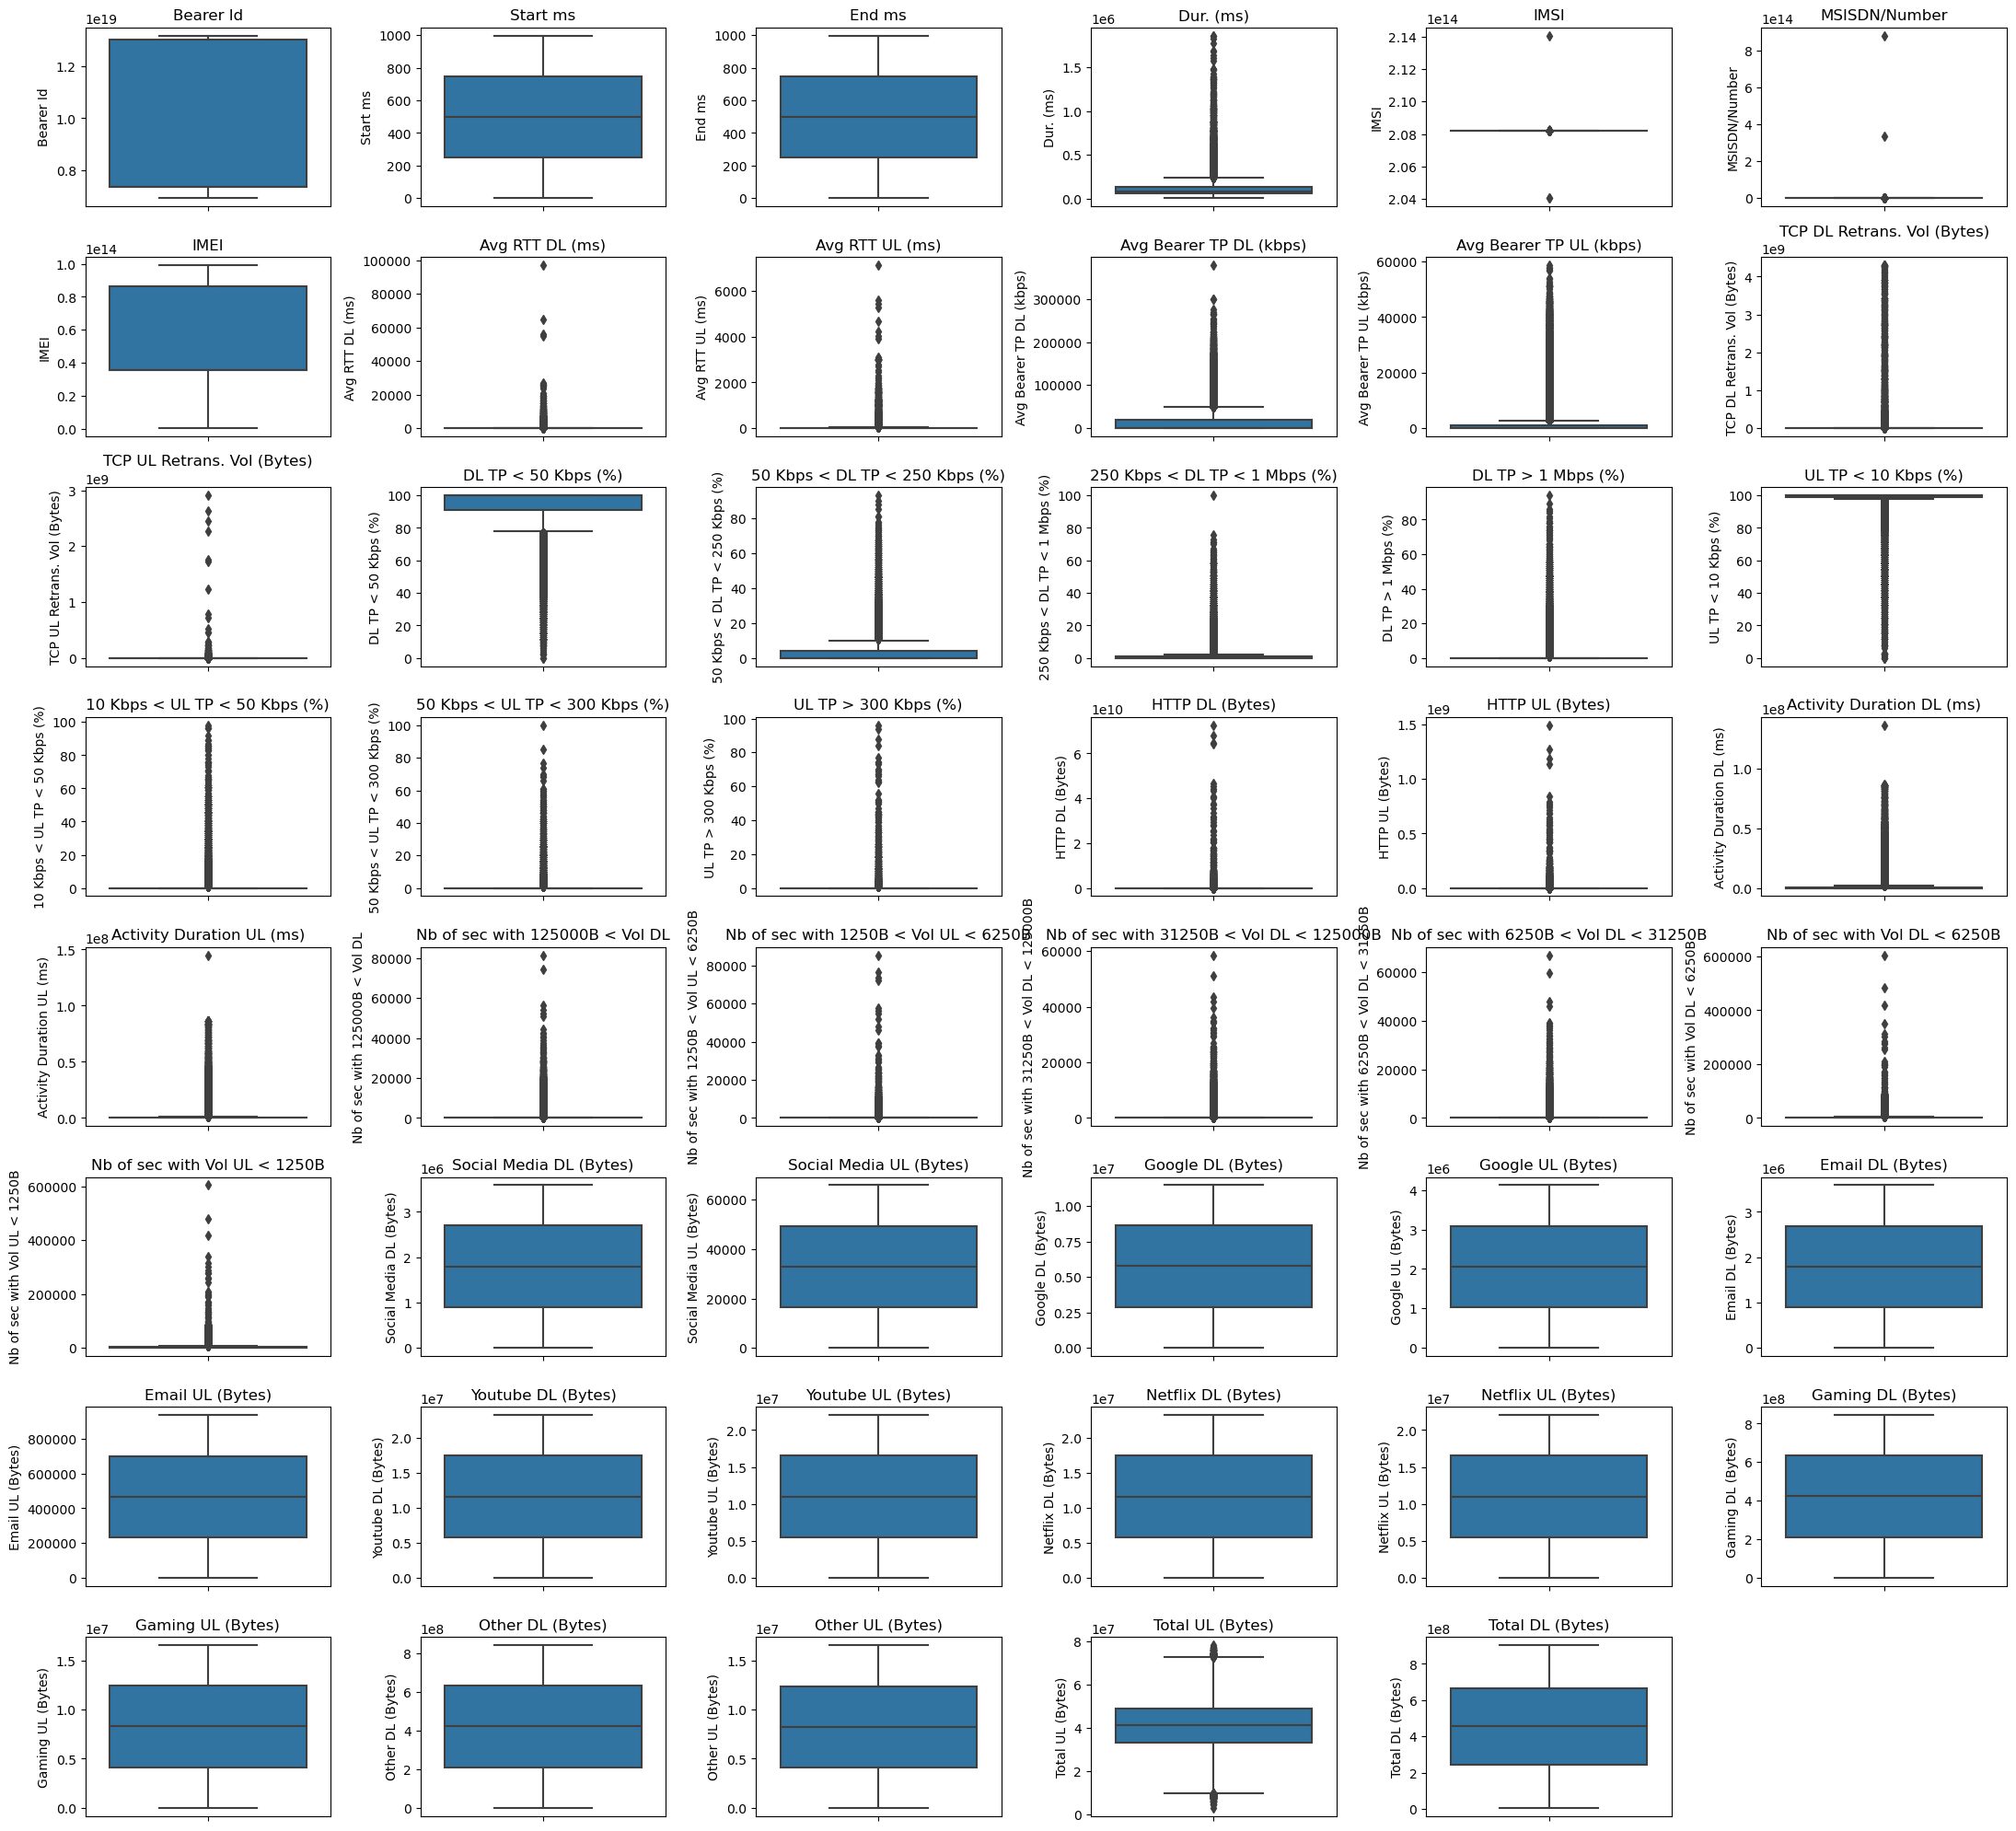

In [25]:
plt.figure(figsize=(22,20))
for i,col in enumerate(num_cols,1):
    plt.subplot(8,6,i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

##  Handeling the Outliers.

In [26]:
for i in num_cols:
    Q1=df[i].quantile(0.25)
    print("The value of first quantile for column",i,"is",Q1)
    Q2=df[i].quantile(0.50)
    print("The value of first quantile for column",i,"is",Q2)
    Q3=df[i].quantile(0.75)
    print("The value of first quantile for column",i,"is",Q3)
    
    IQR=Q3-Q1
    print("The value of Inter Quartile Range is",IQR)
    
    LL=df[i].quantile(0.25)-1.5*(df[i].quantile(0.75)-df[i].quantile(0.25))
    print("The Lower Limit for column",i,"is",LL)
    UL=df[i].quantile(0.75)+1.5*(df[i].quantile(0.75)-df[i].quantile(0.25))
    print("The Upper Limit for column",i,"is",UL)
    
    n=df[(df[i]<LL)|(df[i]>UL)].count()[0]
    print("The Number of outliers for column",i,"is",n)
    
    df[i]=np.where((df[i]<LL)|(df[i]>UL),df[i].mean(),df[i])
    n=df[(df[i]<LL)|(df[i]>UL)].count()[0]
    print("The Number of Outliers after Imputation is",n)     
    print("  ")
    print("  ")

The value of first quantile for column Bearer Id is 7.34988e+18
The value of first quantile for column Bearer Id is 7.34988e+18
The value of first quantile for column Bearer Id is 1.30424e+19
The value of Inter Quartile Range is 5.69252e+18
The Lower Limit for column Bearer Id is -1.1889e+18
The Upper Limit for column Bearer Id is 2.158118e+19
The Number of outliers for column Bearer Id is 0
The Number of Outliers after Imputation is 0
  
  
The value of first quantile for column Start ms is 250.0
The value of first quantile for column Start ms is 499.0
The value of first quantile for column Start ms is 749.0
The value of Inter Quartile Range is 499.0
The Lower Limit for column Start ms is -498.5
The Upper Limit for column Start ms is 1497.5
The Number of outliers for column Start ms is 0
The Number of Outliers after Imputation is 0
  
  
The value of first quantile for column End ms is 251.0
The value of first quantile for column End ms is 500.0
The value of first quantile for column 

In [27]:
# Handeling Outlier for "Dur. (ms)" column.
df["Dur. (ms)"]=np.where(df["Dur. (ms)"]>175358.09737601748,df["Dur. (ms)"].median(),df["Dur. (ms)"])

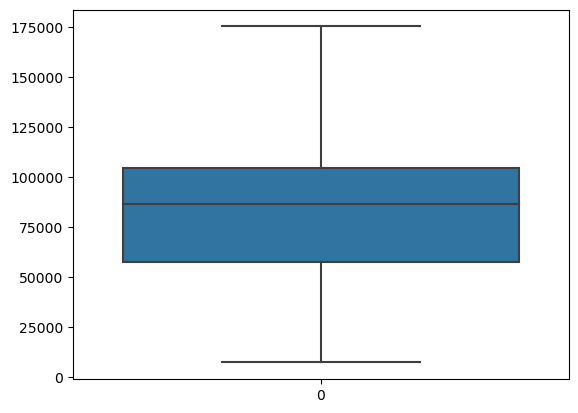

In [28]:
sns.boxplot(df["Dur. (ms)"])
plt.show()

In [29]:
# Handeling outlier for column "Avg Bearer TP DL (kbps)"
df["Avg Bearer TP DL (kbps)"]=np.where(df["Avg Bearer TP DL (kbps)"]>18100.5,df["Avg Bearer TP DL (kbps)"].mean(),df["Avg Bearer TP DL (kbps)"])

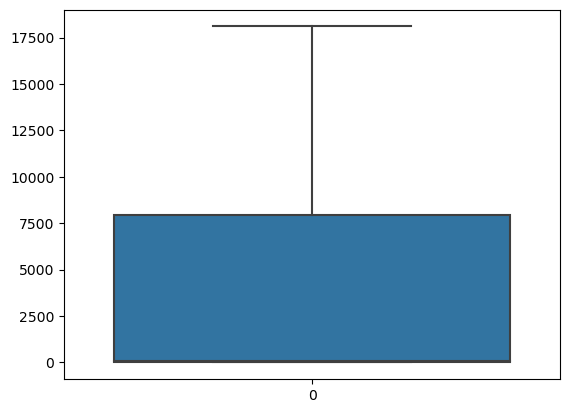

In [30]:
sns.boxplot(df["Avg Bearer TP DL (kbps)"])
plt.show()

In [31]:
# Handeling the outliers for column "DL TP < 50 Kbps (%)".
df["DL TP < 50 Kbps (%)"]=np.where(df["DL TP < 50 Kbps (%)"]<91.29109119328223,df["DL TP < 50 Kbps (%)"].mean(),df["DL TP < 50 Kbps (%)"])

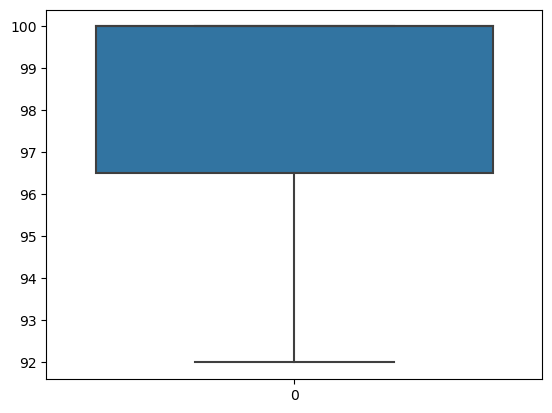

In [32]:
sns.boxplot(df["DL TP < 50 Kbps (%)"])
plt.show()

In [33]:
# Handeling the outlier for the column "50 Kbps < DL TP < 250 Kbps (%)".
df["50 Kbps < DL TP < 250 Kbps (%)"]=np.where(df["50 Kbps < DL TP < 250 Kbps (%)"]>3.809303911222992,df["50 Kbps < DL TP < 250 Kbps (%)"].mean(),df["50 Kbps < DL TP < 250 Kbps (%)"])

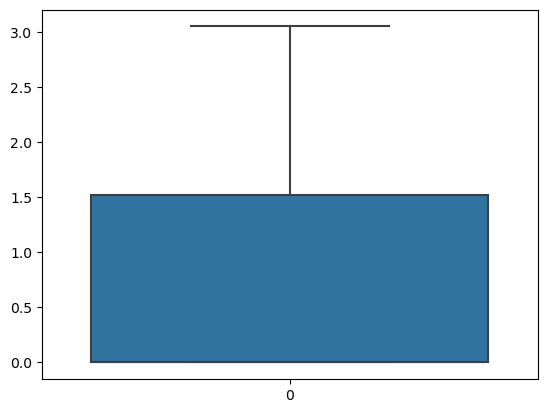

In [34]:
sns.boxplot(df["50 Kbps < DL TP < 250 Kbps (%)"])
plt.show()

In [35]:
# Handeling the outliers for column "Activity Duration DL (ms)".
df["Activity Duration DL (ms)"]=np.where(df["Activity Duration DL (ms)"]>1080125.5,df["Activity Duration DL (ms)"].mean(),df["Activity Duration DL (ms)"])

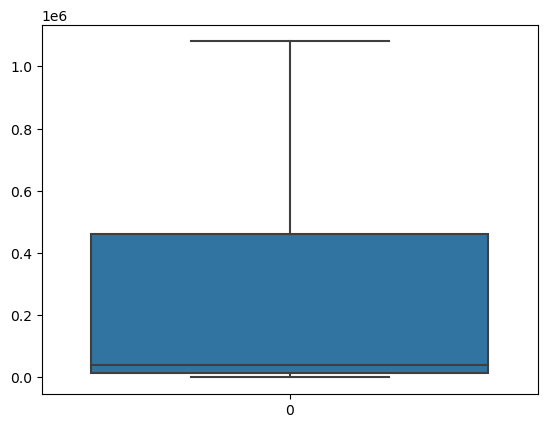

In [36]:
sns.boxplot(df["Activity Duration DL (ms)"])
plt.show()

In [37]:
# Handeling the outliers for column "Total UL (Bytes)".
df["Total UL (Bytes)"]=np.where(df["Total UL (Bytes)"]<9627935.0,df["Total UL (Bytes)"].median(),df["Total UL (Bytes)"])
df["Total UL (Bytes)"]=np.where(df["Total UL (Bytes)"]>72626239.0,df["Total UL (Bytes)"].median(),df["Total UL (Bytes)"])

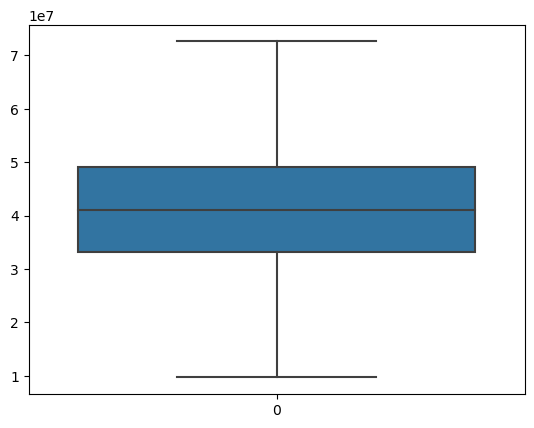

In [38]:
sns.boxplot(df["Total UL (Bytes)"])
plt.show()

## Boxplot after handeling Outlilers.

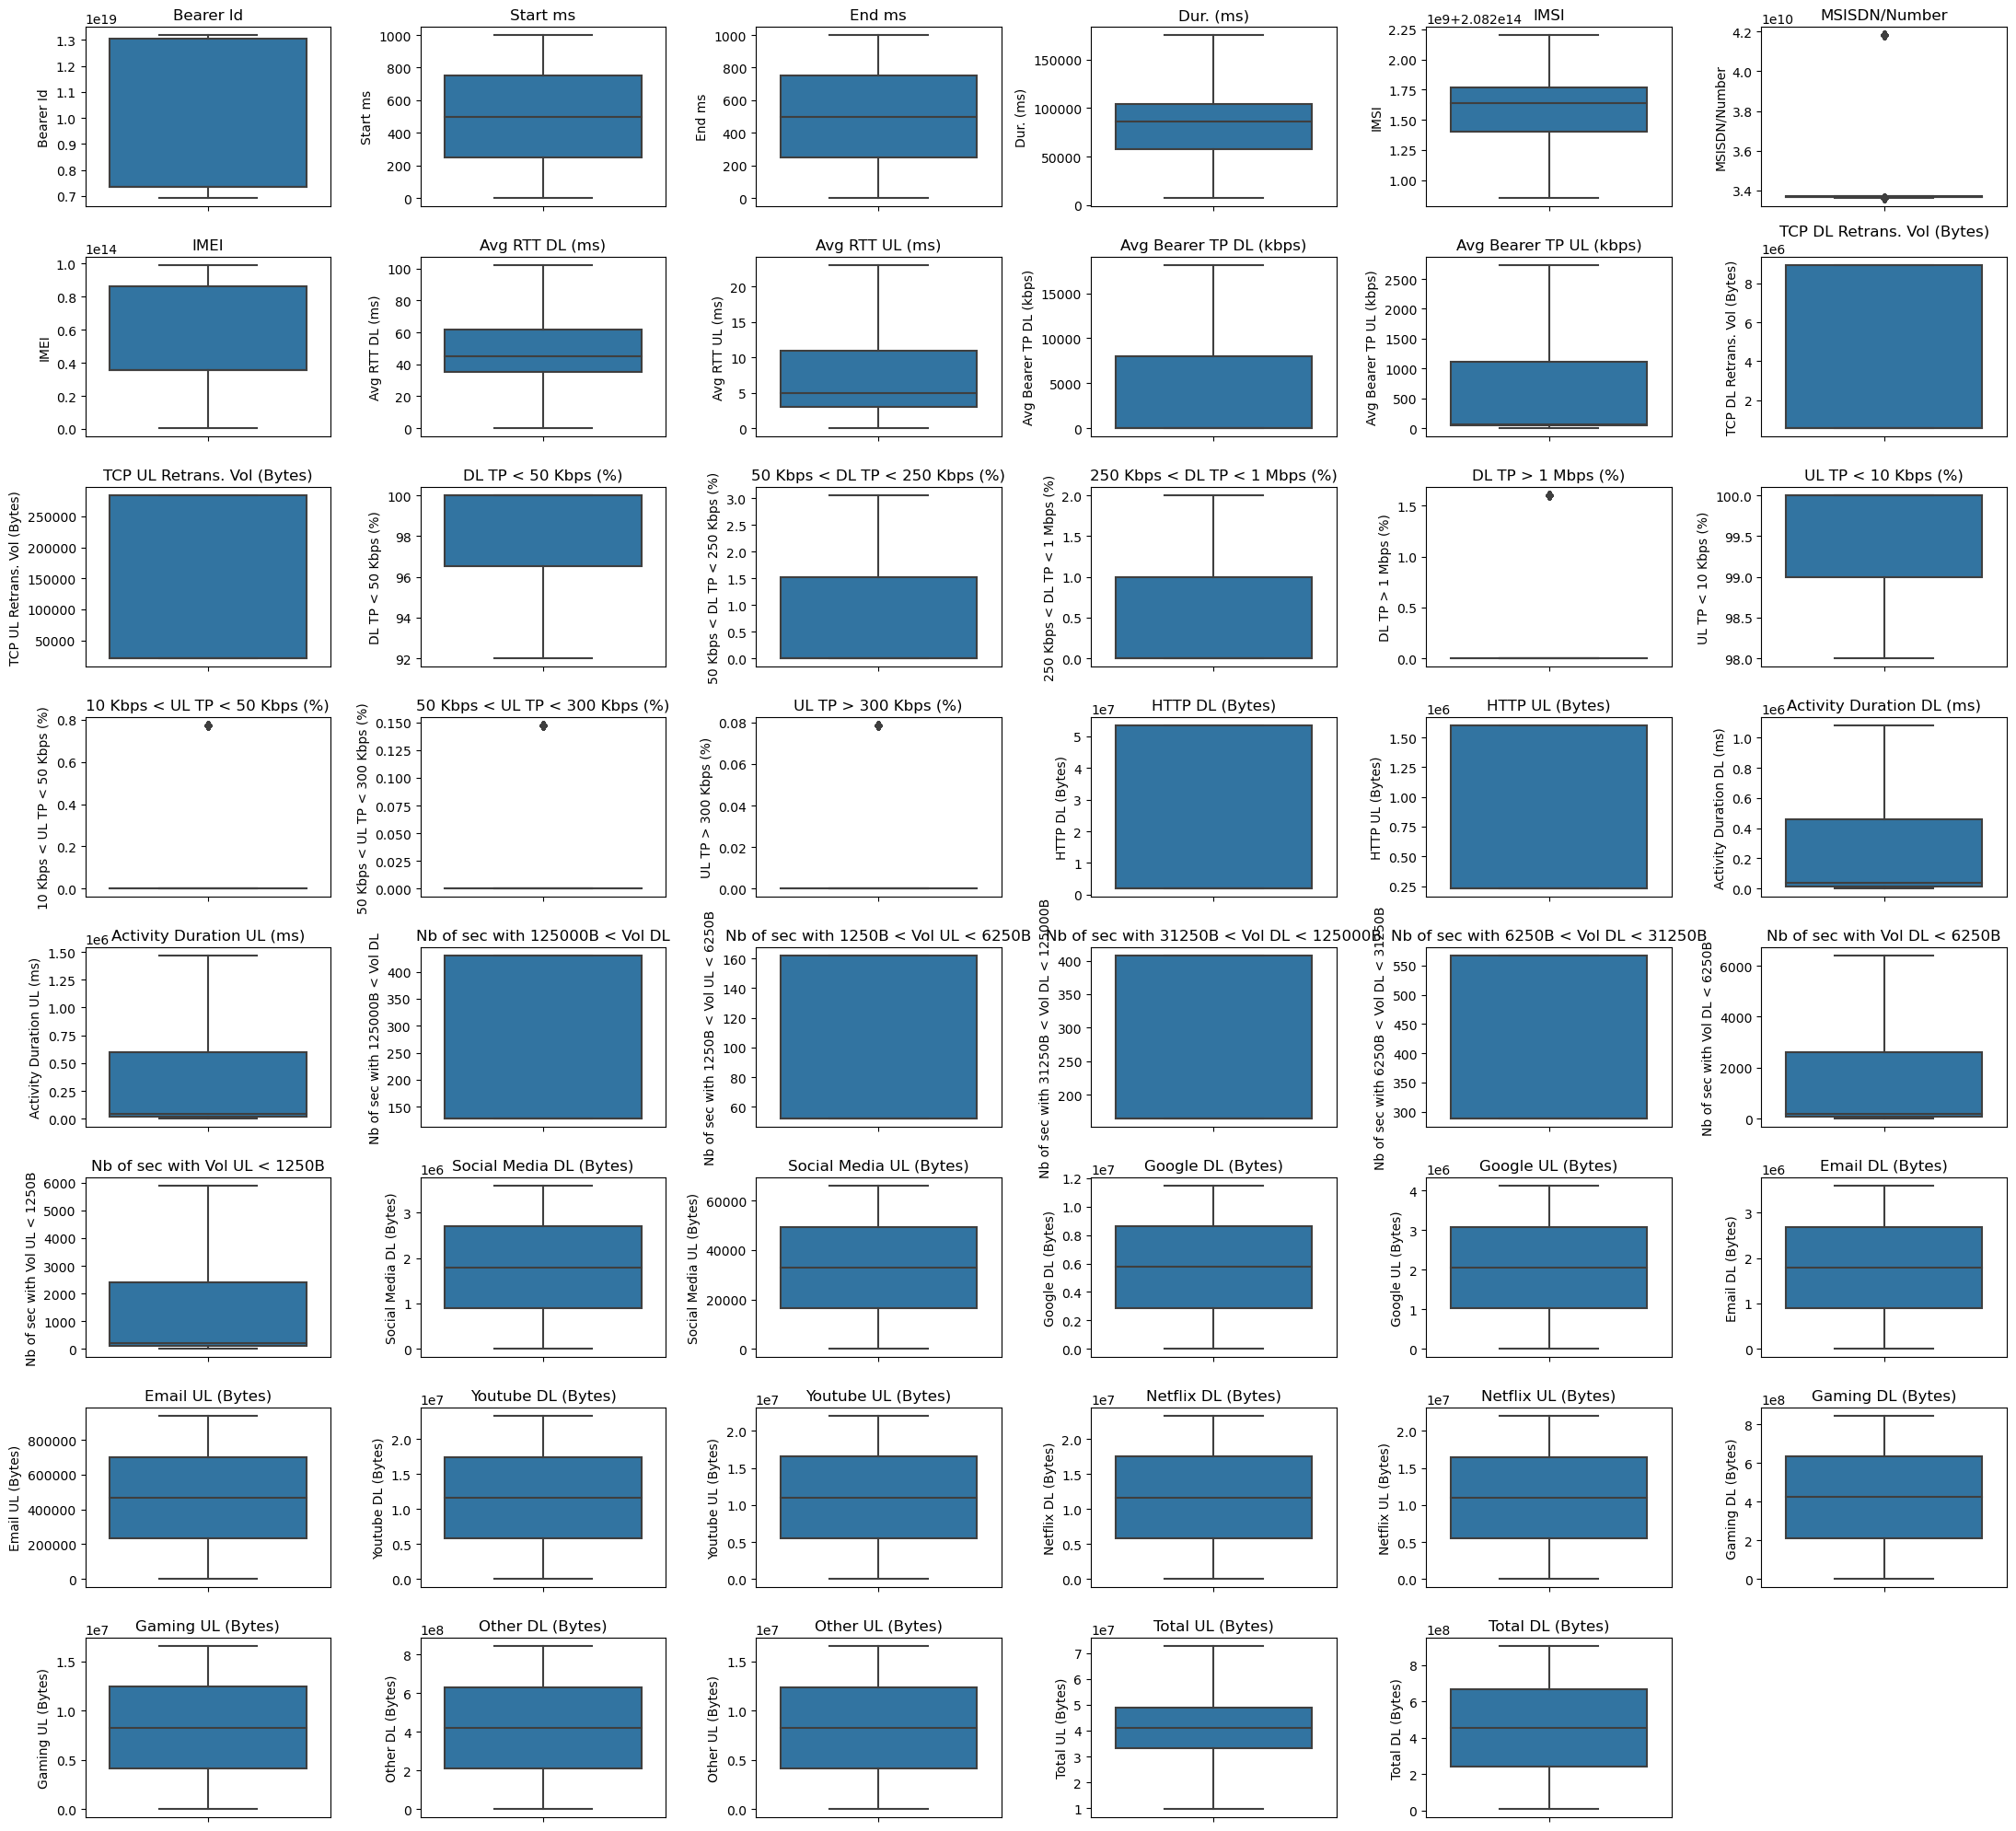

In [39]:
plt.figure(figsize=(22,20))
for i,col in enumerate(num_cols,1):
    plt.subplot(8,6,i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Performing Feature Engineering.

Extracting the data and generating the new data with the help of existing features.
Removing the unwanted columns.

In [40]:
df["Total_Social_Media_Data"]=df['Social Media DL (Bytes)']+df["Social Media UL (Bytes)"]
df["Total_Google_Data"]=df['Google DL (Bytes)']+df['Google UL (Bytes)']
df["Total_Email_Data"]=df['Email DL (Bytes)']+df['Email UL (Bytes)']
df["Total_Youtube_Data"]=df['Youtube DL (Bytes)']+df['Youtube UL (Bytes)']
df["Total_Netflix_Data"]=df["Netflix DL (Bytes)"]+df["Netflix UL (Bytes)"]
df["Total_Gaming_Data"]=df["Gaming DL (Bytes)"]+df["Gaming UL (Bytes)"]
df["Total_Other_Data"]=df["Other DL (Bytes)"]+df["Other UL (Bytes)"]

In [41]:
df["Total DL and UL Data"]=df['Total DL (Bytes)']+df['Total UL (Bytes)']

In [42]:
# Dropping the unwanted columns.
#df.drop(['Social Media DL (Bytes)','Social Media UL (Bytes)',
 #         'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
  #        'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
   #        'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
    #       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)'],axis=1,inplace=True)

## Logical steps, questions, areas of research in the project, and following sub-tasks :- 

In [43]:
# Identifying the top 10 handsets used by the customers.
    
df["Handset Type"].value_counts().nlargest(10)

Huawei B528S-23A                19790
Apple iPhone 6S (A1688)          9452
Apple iPhone 6 (A1586)           9062
undefined                        9018
Apple iPhone 7 (A1778)           6361
Apple iPhone Se (A1723)          5210
Apple iPhone 8 (A1905)           5027
Apple iPhone Xr (A2105)          4585
Samsung Galaxy S8 (Sm-G950F)     4540
Apple iPhone X (A1901)           3825
Name: Handset Type, dtype: int64

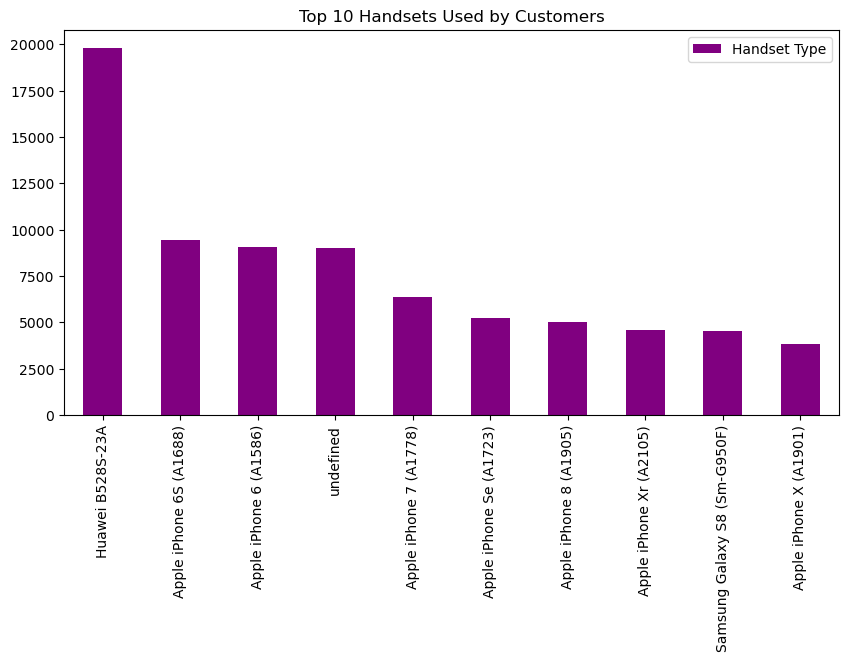

In [44]:
# Showing the top 10 handests used by customers with the help of a bar chart.

plt.figure(figsize=(10,5))
df["Handset Type"].value_counts().nlargest(10).plot(kind="bar",color="purple").legend()
plt.title("Top 10 Handsets Used by Customers")
plt.show()

## The above graph gives the following insights :- 

**1.The above graph shows the top 10 handsets used by customers amoung all the Handests in the dataset.**

**2.We can see the most used handset by customers is Huawei B528S-23A having a count of 19790.**

**3.Also the least used handset by the customers as per above graph is Apple iPhone X (A1901) having count of 3825.**

**4.The above graph also tells us that majority of the customers are using the mobile phones of Huawei Brand.**

In [45]:
# Identifying the top 3 handset manufacturers.

df["Handset Manufacturer"].value_counts().head(3)

Apple      59826
Samsung    40980
Huawei     34527
Name: Handset Manufacturer, dtype: int64

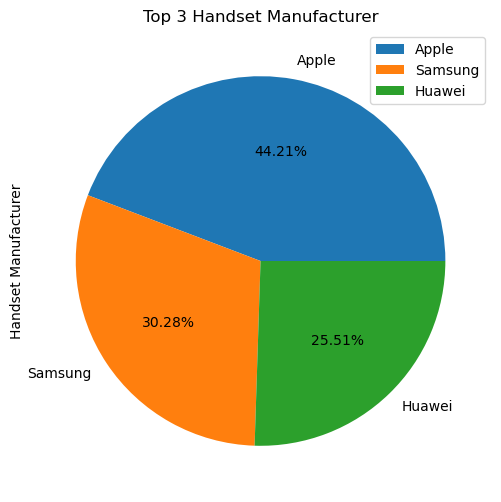

In [46]:
# Showing the percentage of top 3 Manufacturers with the help of Pie Chart.

plt.figure(figsize=(10,6))
df["Handset Manufacturer"].value_counts().head(3).plot(kind="pie",autopct="%0.2f%%").legend()
plt.title("Top 3 Handset Manufacturer")
plt.show()

## The above graph gives the following insights :-

**1. The above graphs shows the top 3 Handset Manufacturers.**

**2. We can see that Apple tops the list having highest manufacturing percentage of 44.21%.**

**3. After Apple Samsung is the 2nd highest Manufacturer having perenctage of 30.28%.**

**4. Huawei comes on the third position with percentage of 25.51%.**

In [47]:
# Identifying the top 5 handsets per top 3 handset manufacturer .

top_makers=df["Handset Manufacturer"].value_counts().nlargest(3).index
df_top=df[df["Handset Manufacturer"].isin(top_makers)]
result=df_top.groupby(["Handset Manufacturer","Handset Type"]).size().reset_index(name='Count').sort_values(["Handset Manufacturer",'Count'],ascending=[True,False]).groupby('Handset Manufacturer').head(5)

In [48]:
print(result)

    Handset Manufacturer                    Handset Type  Count
35                 Apple         Apple iPhone 6S (A1688)   9452
31                 Apple          Apple iPhone 6 (A1586)   9062
41                 Apple          Apple iPhone 7 (A1778)   6361
55                 Apple         Apple iPhone Se (A1723)   5210
48                 Apple          Apple iPhone 8 (A1905)   5027
83                Huawei                Huawei B528S-23A  19790
104               Huawei                    Huawei E5180   2085
183               Huawei  Huawei P20 Lite Huawei Nova 3E   2030
182               Huawei                      Huawei P20   1482
224               Huawei                  Huawei Y6 2018   1002
359              Samsung    Samsung Galaxy S8 (Sm-G950F)   4540
242              Samsung      Samsung Galaxy A5 Sm-A520F   3736
292              Samsung     Samsung Galaxy J5 (Sm-J530)   3704
284              Samsung     Samsung Galaxy J3 (Sm-J330)   3494
357              Samsung    Samsung Gala

## The above output gives the following information :-

**1. The top 3 Handset Manufacturer are "Apple","Huawei",and "Samsung".**

**2. It also shows the top 5 Handset Type of top 3 Handset Manufacturer.**

### Aggregate per user the following information in the column  

**○ Number of xDR sessions.**  

**○ Session duration.**  

**○ The total download (DL) and upload (UL) data.**

**○ The total data volume (in Bytes) during this session for each application.**

In [49]:
df.groupby("MSISDN/Number")["Dur. (ms)","Total DL (Bytes)","Total UL (Bytes)"].agg([np.mean ,np.median, np.sum])

Dur. (ms)                         Total DL (Bytes)  \
                        mean    median           sum             mean   
MSISDN/Number                                                           
3.360417e+10    58922.000000   58922.0  5.892200e+04     5.292440e+08   
3.360417e+10   106494.500000  106494.5  2.129890e+05     4.517255e+08   
3.360418e+10   127367.000000  127367.0  1.273670e+05     7.154997e+08   
3.360418e+10    45126.000000   45126.0  4.512600e+04     2.278016e+08   
3.360418e+10    32435.000000   32435.0  3.243500e+04     6.642542e+08   
...                      ...       ...           ...              ...   
3.370000e+10   171672.000000  171672.0  1.716720e+05     7.784317e+08   
3.370000e+10     9498.000000    9498.0  9.498000e+03     5.465595e+08   
3.370000e+10    66045.000000   66045.0  6.604500e+04     4.484382e+08   
3.370000e+10    86399.000000   86399.0  8.639900e+04     3.530826e+08   
4.182441e+10    85907.158419   86399.0  2.143212e+09     4.520408e+08   

                                         Total UL (Bytes)                \
                    median           sum             mean        median   
MSISDN/Number                                                             
3.360417e+10   529244000.0  5.292440e+08     4.307210e+07  4.307210e+07   
3.360417e+10   451725502.0  9.034510e+08     3.239541e+07  3.239541e+07   
3.360418e+10   715499726.0  7.154997e+08     3.793038e+07  3.793038e+07   
3.360418e+10   227801557.0  2.278016e+08     4.454165e+07  4.454165e+07   
3.360418e+10   664254179.0  6.642542e+08     3.743620e+07  3.743620e+07   
...                    ...           ...              ...           ...   
3.370000e+10   778431728.0  7.784317e+08     4.898112e+07  4.898112e+07   
3.370000e+10   546559526.0  5.465595e+08     3.784142e+07  3.784142e+07   
3.370000e+10   448438156.0  4.484382e+08     3.262826e+07  3.262826e+07   
3.370000e+10   353082629.0  3.530826e+08     4.167086e+07  4.167086e+07   
4.182441e+10   451096590.0  1.127751e+13     4.109559e+07  4.112121e+07   

                             
                        sum  
MSISDN/Number                
3.360417e+10   4.307210e+07  
3.360417e+10   6.479081e+07  
3.360418e+10   3.793038e+07  
3.360418e+10   4.454165e+07  
3.360418e+10   3.743620e+07  
...                     ...  
3.370000e+10   4.898112e+07  
3.370000e+10   3.784142e+07  
3.370000e+10   3.262826e+07  
3.370000e+10   4.167086e+07  
4.182441e+10   1.025253e+12  

[89091 rows x 9 columns]

In [50]:
df.groupby("MSISDN/Number")["Total_Social_Media_Data","Total_Google_Data","Total_Email_Data","Total_Youtube_Data",
                            "Total_Netflix_Data","Total_Gaming_Data","Total_Other_Data"].sum()

Total_Social_Media_Data  Total_Google_Data  Total_Email_Data  \
MSISDN/Number                                                                 
3.360417e+10              9.188010e+05       4.362016e+06      2.299860e+06   
3.360417e+10              2.214142e+06       1.153093e+07      4.457470e+06   
3.360418e+10              3.451216e+06       3.368250e+05      3.931763e+06   
3.360418e+10              2.538148e+06       7.159353e+06      3.871069e+06   
3.360418e+10              7.759160e+05       9.527557e+06      3.233161e+06   
...                                ...                ...               ...   
3.370000e+10              1.525544e+06       2.922475e+06      2.813157e+06   
3.370000e+10              7.876170e+05       1.135828e+07      1.032177e+06   
3.370000e+10              1.279316e+06       1.037474e+07      1.396652e+06   
3.370000e+10              3.432270e+05       1.012454e+07      1.664834e+06   
4.182441e+10              4.568081e+10       1.949231e+11      5.654330e+10   

               Total_Youtube_Data  Total_Netflix_Data  Total_Gaming_Data  \
MSISDN/Number                                                              
3.360417e+10         1.954621e+07        2.755807e+07       5.132055e+08   
3.360417e+10         3.353502e+07        2.438497e+07       8.778847e+08   
3.360418e+10         9.879322e+06        3.458355e+07       6.953183e+08   
3.360418e+10         2.779988e+07        1.903087e+07       2.009846e+08   
3.360418e+10         2.502710e+07        3.536184e+07       6.146464e+08   
...                           ...                 ...                ...   
3.370000e+10         3.683251e+07        2.290728e+07       7.541783e+08   
3.370000e+10         3.097622e+07        2.133642e+07       5.098622e+08   
3.370000e+10         1.885044e+07        2.257492e+07       4.226600e+08   
3.370000e+10         2.582723e+07        8.718765e+06       3.324118e+08   
4.182441e+10         5.662487e+11        5.653617e+11       1.066810e+13   

               Total_Other_Data  
MSISDN/Number                    
3.360417e+10       2.212550e+08  
3.360417e+10       1.086051e+09  
3.360418e+10       2.068831e+08  
3.360418e+10       8.461103e+08  
3.360418e+10       4.800891e+08  
...                         ...  
3.370000e+10       2.930375e+08  
3.370000e+10       4.314203e+08  
3.370000e+10       3.962178e+08  
3.370000e+10       8.492620e+07  
4.182441e+10       1.073733e+13  

[89091 rows x 7 columns]

# Univariate Analysis.

In [51]:
df["Dur. (ms)"].skew().round(2)

0.16

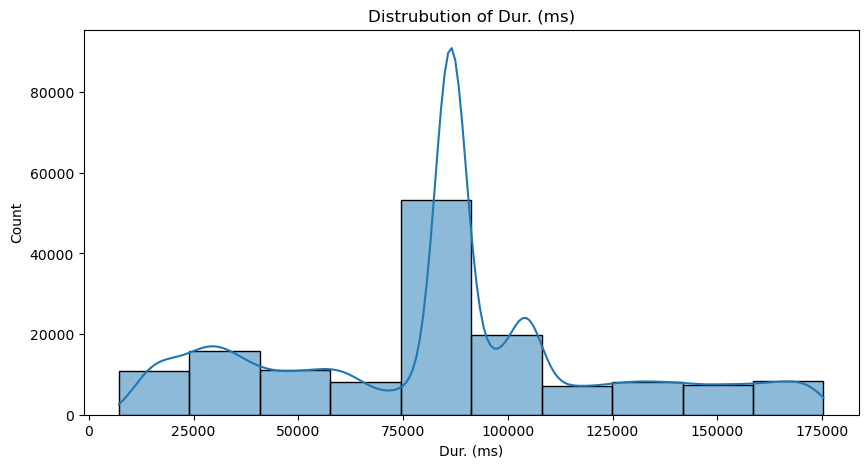

In [52]:
# Checking the Total Duration of xDR session.

plt.figure(figsize=(10,5))
sns.histplot(df["Dur. (ms)"],kde=True,bins=10)
plt.title("Distrubution of Dur. (ms)")
plt.show()

## The above graph gives the following insights :-

**1. The above graph is positively skewed i.e the tail of the data lies on the right hand side.**

**2. A skewness value of 0.16 indicates a weak positive skew. This means the distribution is slightly asymmetrical.**

**3. Majority of the data lies in between the range of 75000 and 100000.**

In [53]:
# Finding the least used top 10 handset used by customers.

df["Handset Type"].value_counts().nsmallest(10)

Zte Blade A506 Blade A506                    1
Apple iPhone Xs (A2098)                      1
Samsung Galaxy Trend Plus (Gt-S7580)         1
Tct Mobile Suzho. Alcatel Onetouch Pop S3    1
Power Idea Techn. Rg160                      1
Sfr Altice S21                               1
Samsung Galaxy J3 (Sm-J327)                  1
Huawei Rvl-Al09                              1
Sony Mobile Comm. Sony Xperia Z2 (D6503)     1
Teletalk Pvt Ltd Colors F016                 1
Name: Handset Type, dtype: int64

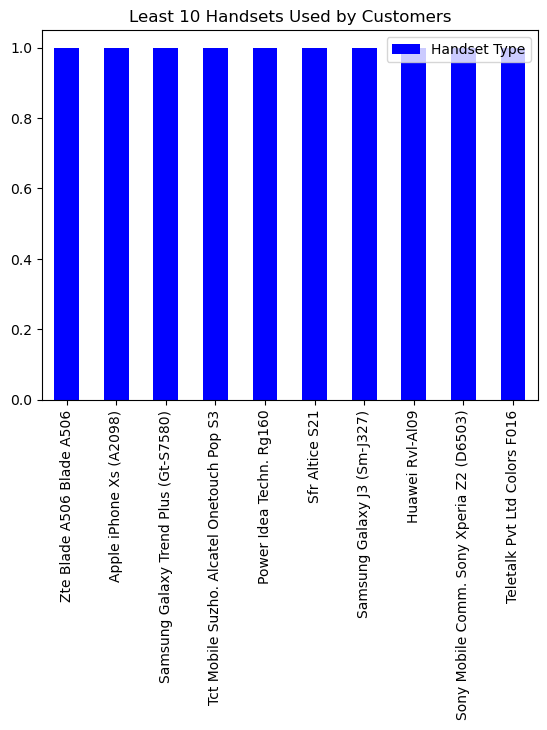

In [54]:

df["Handset Type"].value_counts().nsmallest(10).plot(kind="bar",color="Blue").legend()
plt.title("Least 10 Handsets Used by Customers")
plt.show()

# The above graph gives the following insights :-

**1. It shows the least used Handset by the customers.**

**2. These are the Names of the least used Handsets by the customers :-**
    
    
               .Zte Blade A506 Blade A506                    
               .Apple iPhone Xs (A2098)                      
               .Samsung Galaxy Trend Plus (Gt-S7580)         
               .Tct Mobile Suzho. Alcatel Onetouch Pop S3    
               .Power Idea Techn. Rg160                      
               .Sfr Altice S21                               
               .Samsung Galaxy J3 (Sm-J327)                  
               .Huawei Rvl-Al09                              
               .Sony Mobile Comm. Sony Xperia Z2 (D6503)     
               .Teletalk Pvt Ltd Colors F016                 
                
**3. So these Handsets are not preferred it can impact the customer attraction.**                

In [55]:
# Checking for the Least 10 Handset Manufacturer.

df["Handset Manufacturer"].value_counts().nsmallest(10)

Yop Technology Co Limited                          1
Lephone                                            1
Tianyu                                             1
Hewlett-Packard                                    1
Civicom Technology (Hk) Co Limited                 1
Shenzhen Huadoo Bright Group Limited               1
Beijing Shenqi Technology Co Ltd                   1
Shenzhen Chainway Information Technology Co Ltd    1
Casper Bilgisayar Sistemleri A.S                   1
Essential Products Inc.                            1
Name: Handset Manufacturer, dtype: int64

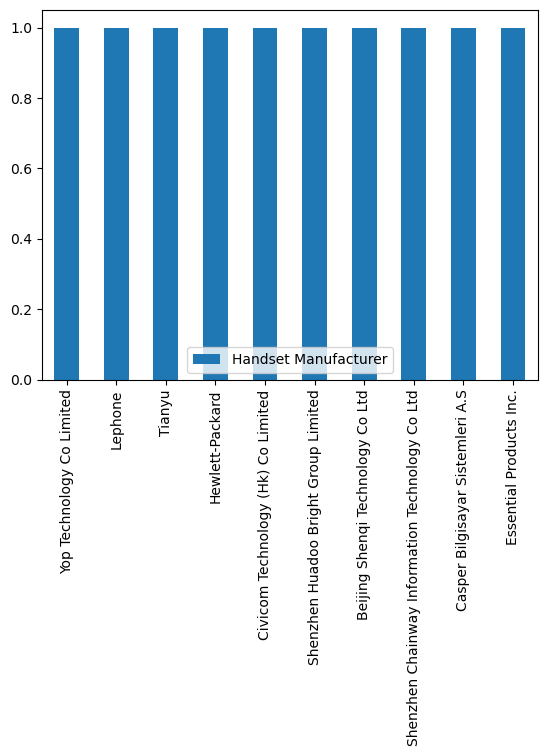

In [56]:
#plt.figure(figsize=(10,6))
df["Handset Manufacturer"].value_counts().nsmallest(10).plot(kind="bar").legend()
plt.show()

# The above graph gives the following insights :- 

**1. It shows the Brands which comes under the least Manufacturing of Mobile Phones.**

**2. Few Names of the least Handsets Manufacturing Brands :-**
    
        
        .Yop Technology Co Limited                          
        .Lephone                                            
        .Tianyu                                             
        .Hewlett-Packard                                    
        .Civicom Technology (Hk) Co Limited                 
        .Shenzhen Huadoo Bright Group Limited               
        .Beijing Shenqi Technology Co Ltd                   
        .Shenzhen Chainway Information Technology Co Ltd   
        .Casper Bilgisayar Sistemleri A.S                   
        .Essential Products Inc.                            
        
**3. These Brands has the limited access to the customers.**        

##  Total DL (Bytes).

In [57]:
df["Total DL (Bytes)"].skew().round(2)

-0.0

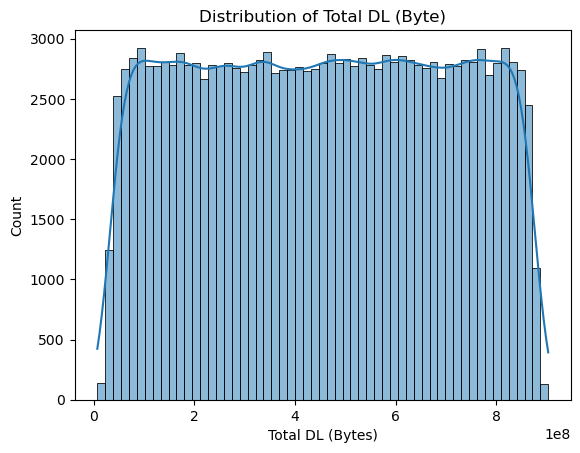

In [58]:
# Checking the distribution of Total DL (Bytes).

sns.histplot(df["Total DL (Bytes)"],kde=True)
plt.title("Distribution of Total DL (Byte)")
plt.show()

# The above graph gives the following insights:-

**1. The histogram reveals a fairly even distribution of "Total DL (Byte)" in this telecommunication industry dataset, suggesting consistent data usage across the observed range.**

**2. Slight Peaks and Valleys:-  While generally uniform, there are some minor fluctuations.
                                 We can observe very slight peaks and valleys in the frequency across the distribution. 
                                 However, these variations are not very pronounced.**
            
**3. Range of Data: The "Total DL (Byte)" values appear to span from approximately 0 to 9e8 (which is 900 million bytes).**            

## Total UL (Bytes)

In [59]:
df["Total UL (Bytes)"].skew().round(2)

-0.0

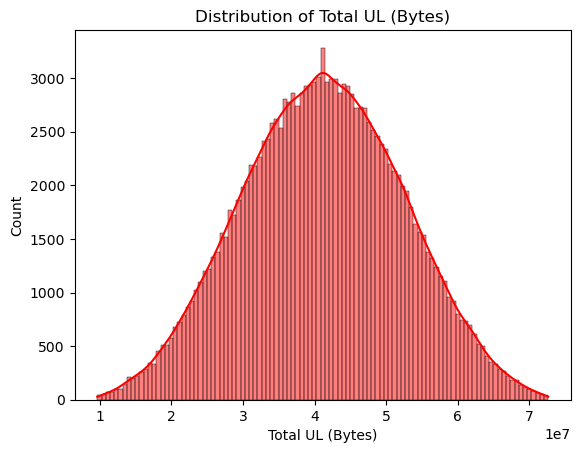

In [60]:
sns.histplot(df["Total UL (Bytes)"],kde=True,color="Red",edgecolor="Black")
plt.title("Distribution of Total UL (Bytes)")
plt.show()

## The above graph gives the following insights :- 

**1. It shows the Distribution of Total UL (Bytes).**

**2. The graph seems to be bell shaped which means data is symmetrical.**

**3. As the data is symmetrical i.e mean=median=mode.**

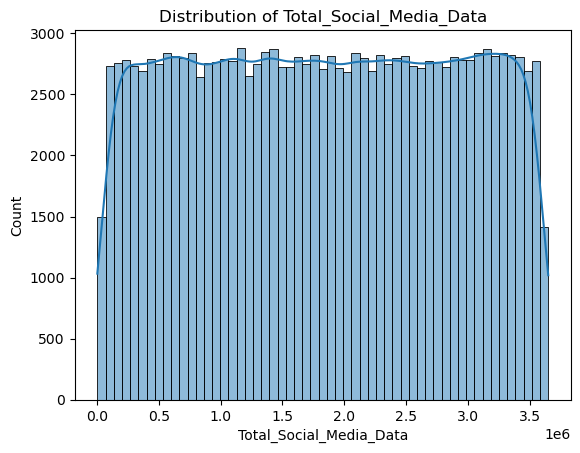

In [61]:
sns.histplot(df["Total_Social_Media_Data"],kde=True)
plt.title("Distribution of Total_Social_Media_Data")
plt.show()

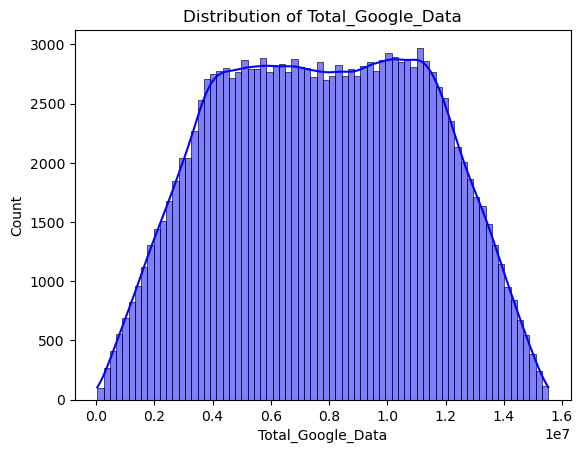

In [62]:
sns.histplot(df["Total_Google_Data"],kde=True,color="Blue",edgecolor="Black")
plt.title("Distribution of Total_Google_Data")
plt.show()

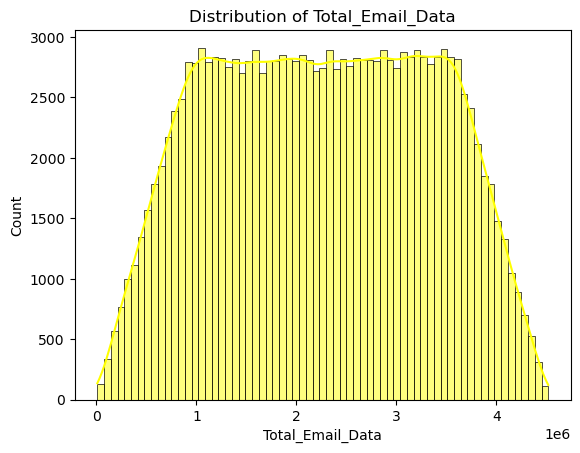

In [63]:
sns.histplot(df["Total_Email_Data"],kde=True,color="yellow",edgecolor="Black")
plt.title("Distribution of Total_Email_Data")
plt.show()

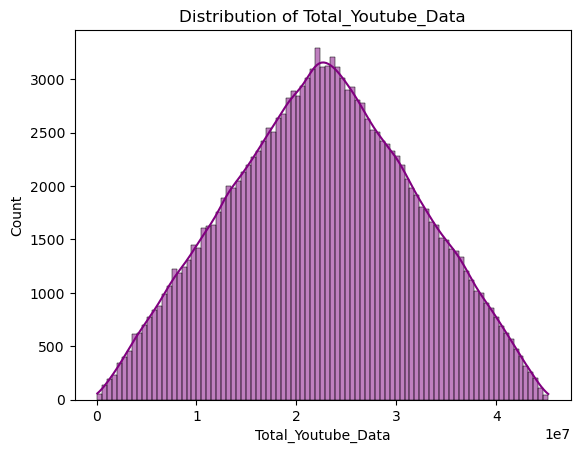

In [64]:
sns.histplot(df["Total_Youtube_Data"],kde=True,color="purple",edgecolor="Black")
plt.title("Distribution of Total_Youtube_Data")
plt.show()

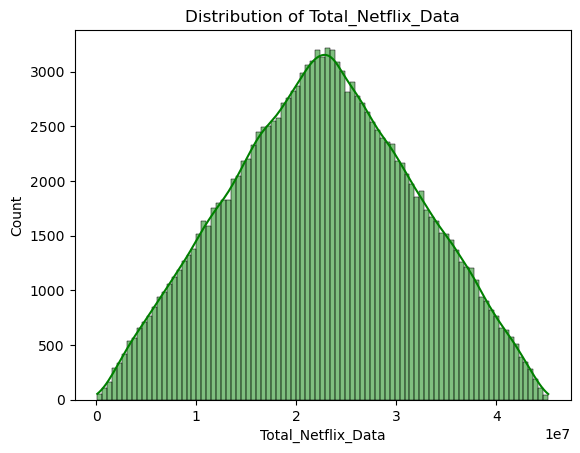

In [65]:
sns.histplot(df["Total_Netflix_Data"],kde=True,color="green",edgecolor="Black")
plt.title("Distribution of Total_Netflix_Data")
plt.show()

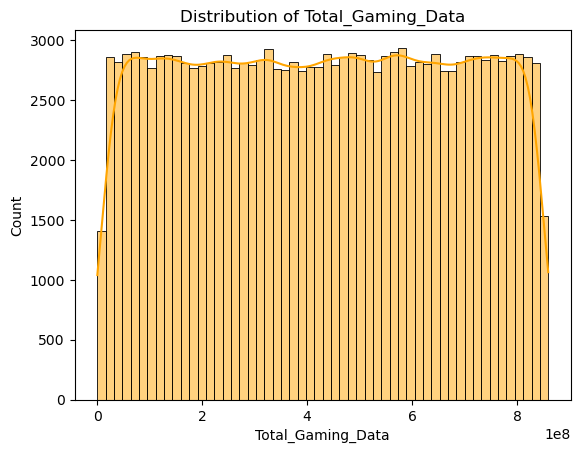

In [66]:
sns.histplot(df["Total_Gaming_Data"],kde=True,color="orange",edgecolor="Black")
plt.title("Distribution of Total_Gaming_Data")
plt.show()

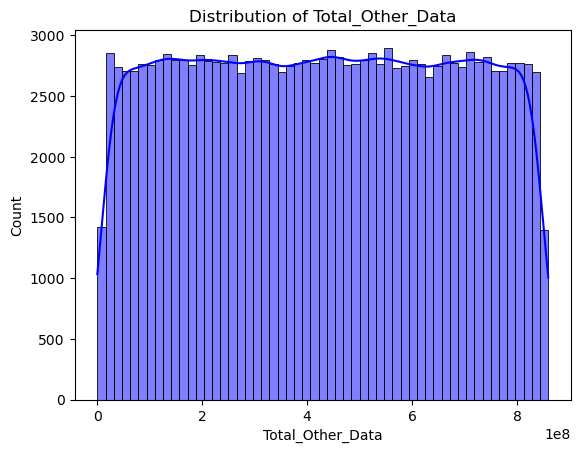

In [67]:
sns.histplot(df["Total_Other_Data"],kde=True,color="blue",edgecolor="Black")
plt.title("Distribution of Total_Other_Data")
plt.show()

## Bivariate Analysis :- Explore the relationship between each application & the total DL+UL data.

In [68]:
# Checking the correlation between "Total_Google_Data" and "Total DL+UL Data".
df["Total_Google_Data"].corr(df["Total DL and UL Data"]).round(2)

0.01

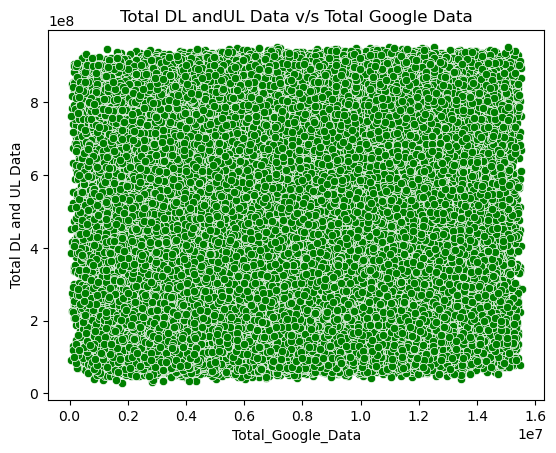

In [69]:
sns.scatterplot(x="Total_Google_Data",y="Total DL and UL Data",data=df,color="green")
plt.title("Total DL andUL Data v/s Total Google Data")
plt.show()

In [70]:
# Checking the correlation between "Total Gaming Data" and "Total DL+UL Data".
df["Total_Gaming_Data"].corr(df["Total DL and UL Data"]).round(3)

0.998

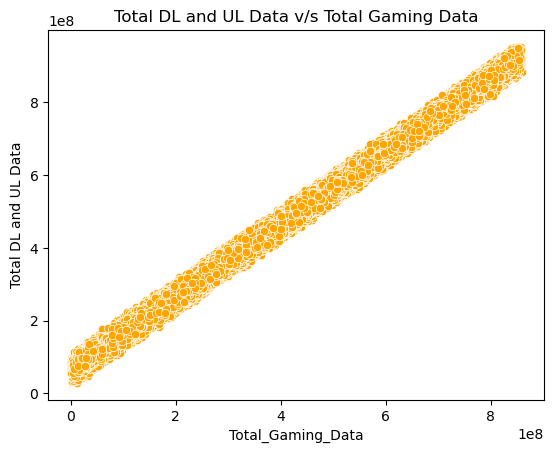

In [71]:
sns.scatterplot(x="Total_Gaming_Data",y="Total DL and UL Data",data=df,color="orange")
plt.title("Total DL and UL Data v/s Total Gaming Data")
plt.show()

In [72]:
# Checking the correlation between "Total Email Data" and "Total DL+UL Data".
df["Total_Email_Data"].corr(df["Total DL and UL Data"]).round(3)

0.004

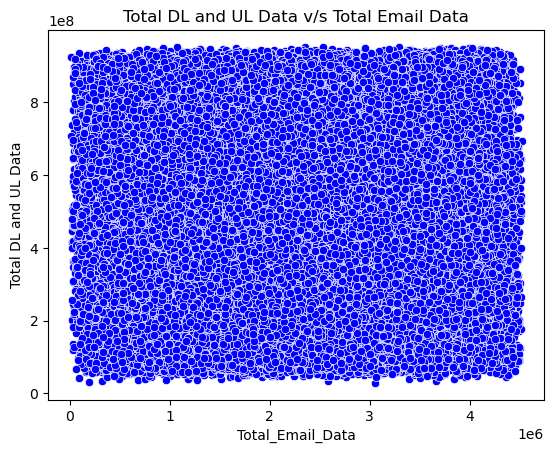

In [73]:
sns.scatterplot(x="Total_Email_Data",y="Total DL and UL Data",data=df,color="blue")
plt.title("Total DL and UL Data v/s Total Email Data")
plt.show()

In [74]:
# Checking the correlation between "Total Youtube Data" and "Total DL+UL Data".
df["Total_Youtube_Data"].corr(df["Total DL and UL Data"]).round(3)

0.035

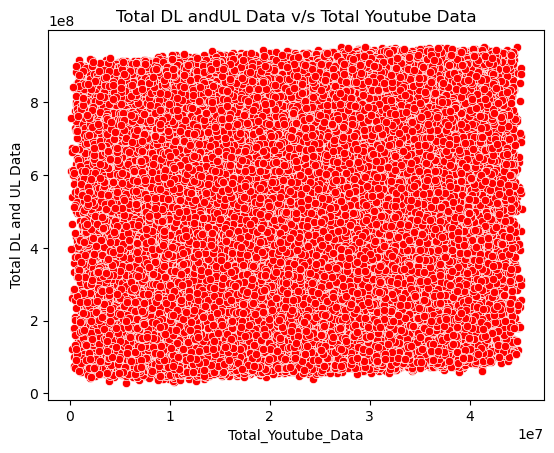

In [75]:
sns.scatterplot(x="Total_Youtube_Data",y="Total DL and UL Data",data=df,color="red")
plt.title("Total DL andUL Data v/s Total Youtube Data")
plt.show()

In [76]:
# Checking the correlation between "Total Netflix Data" and "Total DL+UL Data".
df["Total_Netflix_Data"].corr(df["Total DL and UL Data"]).round(3)

0.035

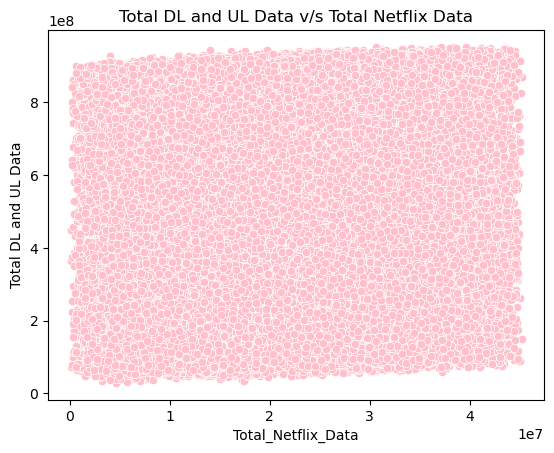

In [77]:
sns.scatterplot(x="Total_Netflix_Data",y="Total DL and UL Data",data=df,color="pink")
plt.title("Total DL and UL Data v/s Total Netflix Data")
plt.show()

In [78]:
# Checking the correlation between "Total Social Media Data" and "Total DL+UL Data".
df["Total_Social_Media_Data"].corr(df["Total DL and UL Data"]).round(3)

0.005

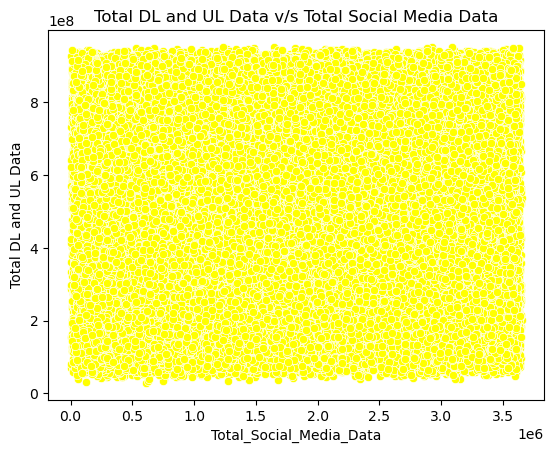

In [79]:
sns.scatterplot(x="Total_Social_Media_Data",y="Total DL and UL Data",data=df,color="yellow")
plt.title("Total DL and UL Data v/s Total Social Media Data")
plt.show()

In [80]:
# Checking the correlation between "Total Other Data" and "Total DL+UL Data".
df["Total_Other_Data"].corr(df["Total DL and UL Data"]).round(3)

-0.002

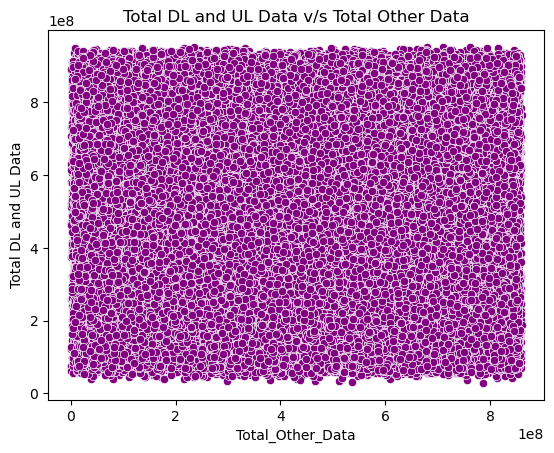

In [81]:
sns.scatterplot(x="Total_Other_Data",y="Total DL and UL Data",data=df,color="purple")
plt.title("Total DL and UL Data v/s Total Other Data")
plt.show()

# Multivariate Analysis.

Correlation Analysis – compute a correlation matrix for the following variables and 
interpret your findings: Social Media data, Google data, Email data, YouTube data, 
Netflix data, Gaming data, and Other data   

In [82]:
columns_to_include=["Total_Social_Media_Data","Total_Google_Data","Total_Email_Data","Total_Youtube_Data","Total_Netflix_Data",
                    "Total_Gaming_Data","Total_Other_Data"]

In [83]:
correlation_matrix = df[columns_to_include].corr()

In [84]:
correlation_matrix

Total_Social_Media_Data  Total_Google_Data  \
Total_Social_Media_Data                 1.000000          -0.001708   
Total_Google_Data                      -0.001708           1.000000   
Total_Email_Data                        0.004032          -0.000412   
Total_Youtube_Data                      0.000548           0.002277   
Total_Netflix_Data                      0.001013          -0.001902   
Total_Gaming_Data                       0.001082          -0.000994   
Total_Other_Data                        0.006065          -0.001727   

                         Total_Email_Data  Total_Youtube_Data  \
Total_Social_Media_Data          0.004032            0.000548   
Total_Google_Data               -0.000412            0.002277   
Total_Email_Data                 1.000000           -0.002919   
Total_Youtube_Data              -0.002919            1.000000   
Total_Netflix_Data               0.001029            0.002882   
Total_Gaming_Data               -0.000644           -0.002999   
Total_Other_Data                -0.001299            0.002969   

                         Total_Netflix_Data  Total_Gaming_Data  \
Total_Social_Media_Data            0.001013           0.001082   
Total_Google_Data                 -0.001902          -0.000994   
Total_Email_Data                   0.001029          -0.000644   
Total_Youtube_Data                 0.002882          -0.002999   
Total_Netflix_Data                 1.000000          -0.003109   
Total_Gaming_Data                 -0.003109           1.000000   
Total_Other_Data                  -0.009033          -0.002661   

                         Total_Other_Data  
Total_Social_Media_Data          0.006065  
Total_Google_Data               -0.001727  
Total_Email_Data                -0.001299  
Total_Youtube_Data               0.002969  
Total_Netflix_Data              -0.009033  
Total_Gaming_Data               -0.002661  
Total_Other_Data                 1.000000

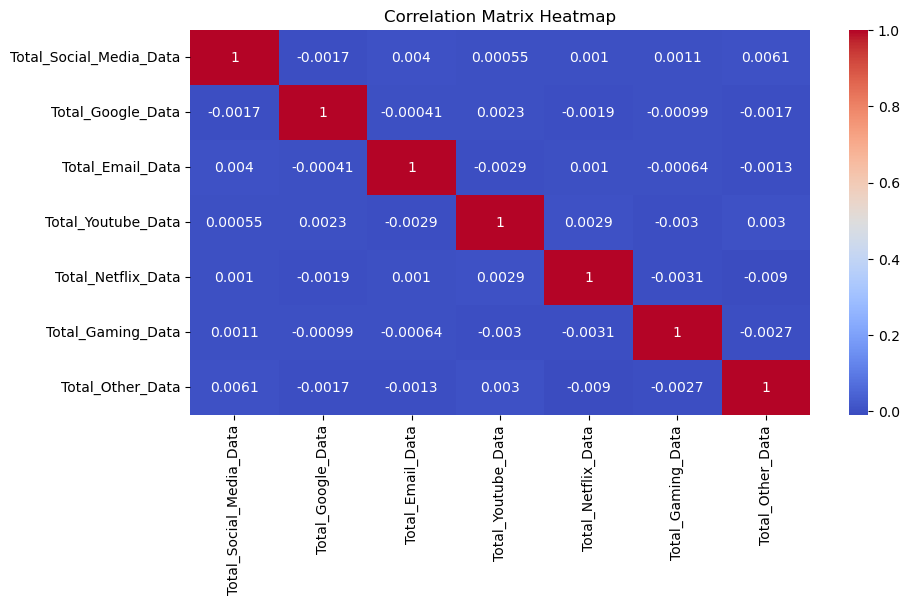

In [85]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

## The above graph gives the following insights :-

**There is no strong positive correlation between any of the app categories. Most values are very close to 0 or in negative, indicating that usage in one app category is largely independent of others.**

**The diagonal shows perfect correlation (1.00) because each app category is, of course, perfectly correlated with itself.**

**Minor variations like -0.01 or 0.01 are statistically negligible and suggest no meaningful relationship.**

# Dimensionality Reduction

**Perform a Principal Component Analysis (PCA) to reduce the dimensions of your data.**

In [86]:
# 1. Select relevant numerical features
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# 2. Handle missing values by replacing them with the mean
df_numeric.fillna(df_numeric.mean(), inplace=True)

# 3. Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# 4. Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components
principal_components = pca.fit_transform(df_scaled)

# 5. Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.3023437  0.07270825]


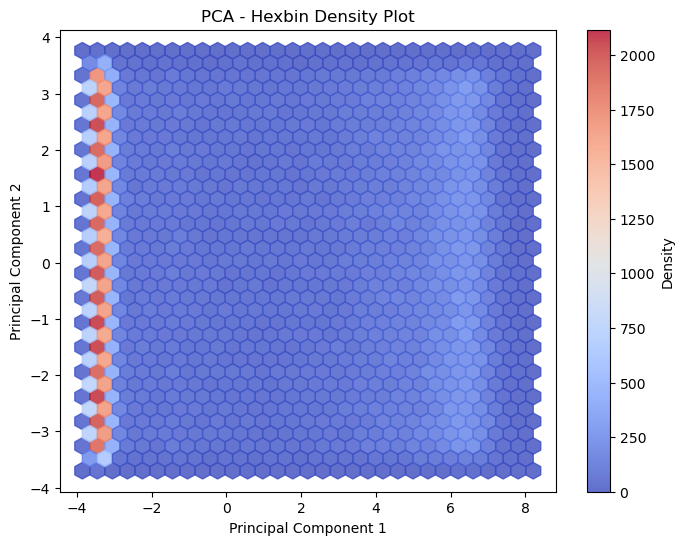

In [87]:
####Visualize the PCA Results
plt.figure(figsize=(8,6))
plt.hexbin(pca_df['PC1'], pca_df['PC2'], gridsize=30, cmap='coolwarm', alpha=0.8)
plt.colorbar(label="Density")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Hexbin Density Plot')
plt.show()
##Explained Variance Ratio: Indicates how much of the dataset’s variance is captured by the principal components.

##Visualization: Helps identify patterns or clusters in the data.

## The above graph gives the following insights :- 
    
**Two distinct dense clusters are visible.**

**These clusters represent groups of users who share similar behavior or patterns in the original high-dimensional data.**

**High-density regions (indicated in red and white) show where most users are concentrated, while blue areas indicate lower density.**

# Task-2 User Engagement Analysis 

## user’s engagement using the following engagement metrics:   

● sessions frequency   
● the duration of the session   
● the session total traffic (download and upload (bytes))

### Sessios Frequency.

In [88]:
df.groupby("MSISDN/Number")["Bearer Id"].count()

MSISDN/Number
3.360417e+10        1
3.360417e+10        2
3.360418e+10        1
3.360418e+10        1
3.360418e+10        1
                ...  
3.370000e+10        1
3.370000e+10        1
3.370000e+10        1
3.370000e+10        1
4.182441e+10    24948
Name: Bearer Id, Length: 89091, dtype: int64

###  The duration of session.

In [89]:
df.groupby("MSISDN/Number")["Dur. (ms)"].sum()

MSISDN/Number
3.360417e+10    5.892200e+04
3.360417e+10    2.129890e+05
3.360418e+10    1.273670e+05
3.360418e+10    4.512600e+04
3.360418e+10    3.243500e+04
                    ...     
3.370000e+10    1.716720e+05
3.370000e+10    9.498000e+03
3.370000e+10    6.604500e+04
3.370000e+10    8.639900e+04
4.182441e+10    2.143212e+09
Name: Dur. (ms), Length: 89091, dtype: float64

###  The session total traffic (download and upload (bytes))

In [90]:
df.groupby("MSISDN/Number")["Total DL and UL Data"].sum()

MSISDN/Number
3.360417e+10    5.723161e+08
3.360417e+10    9.682418e+08
3.360418e+10    7.534301e+08
3.360418e+10    2.723432e+08
3.360418e+10    7.016904e+08
                    ...     
3.370000e+10    8.274129e+08
3.370000e+10    5.844009e+08
3.370000e+10    4.810664e+08
3.370000e+10    3.947535e+08
4.182441e+10    1.230277e+13
Name: Total DL and UL Data, Length: 89091, dtype: float64

## Aggregate the above metrics per customer ID (MSISDN) and report the top 10 customers per engagement metric  

In [91]:
users = df[['MSISDN/Number', 'Bearer Id', 'Dur. (ms)', 'Total DL and UL Data']].copy().rename(columns={'Dur. (ms)': 'time_duration'})
users

MSISDN/Number     Bearer Id  time_duration  Total DL and UL Data
0        3.366496e+10  1.311450e+19   104608.43895           345629377.0
1        3.368185e+10  1.311450e+19   104608.43895           707185356.0
2        4.182441e+10  1.311450e+19   104608.43895           307690973.0
3        4.182441e+10  1.311450e+19   104608.43895           889352748.0
4        3.369980e+10  1.311450e+19   104608.43895           607681403.0
...               ...           ...            ...                   ...
149996   3.365069e+10  7.277830e+18    81230.00000           631804110.0
149997   3.366345e+10  7.349880e+18    97970.00000           705783925.0
149998   3.362189e+10  1.311450e+19    98249.00000           627698629.0
149999   3.361962e+10  1.311450e+19    97910.00000           401522016.0
150000   3.366371e+10  7.349880e+18    86399.00000           496984389.5

[150001 rows x 4 columns]

In [92]:
users = users.groupby('MSISDN/Number').agg({'Bearer Id': 'count', 'time_duration': 'sum', 'Total DL and UL Data': 'sum'})
users = users.rename(columns={'Bearer Id': 'sessions'})
users.head(10)

sessions  time_duration  Total DL and UL Data
MSISDN/Number                                               
3.360417e+10          1        58922.0           572316096.0
3.360417e+10          2       212989.0           968241818.0
3.360418e+10          1       127367.0           753430101.0
3.360418e+10          1        45126.0           272343206.0
3.360418e+10          1        32435.0           701690381.0
3.360418e+10          1        42160.0           432586615.0
3.360418e+10          1        12447.0           919297232.0
3.360418e+10          1        41265.0           405542716.0
3.360419e+10          1        31938.0           836725075.0
3.360419e+10          1        52192.0           548515446.0

#### Top 10 user engagement to Session Frequency.

In [93]:
users.nlargest(10, 'sessions')

sessions  time_duration  Total DL and UL Data
MSISDN/Number                                               
4.182441e+10      24948   2.143212e+09          1.230277e+13
3.366371e+10       1067   6.072511e+07          5.319969e+11
3.362632e+10         18   1.932601e+06          7.971167e+09
3.361489e+10         17   1.828495e+06          8.846226e+09
3.362578e+10         17   1.760134e+06          8.499621e+09
3.365973e+10         16   1.805503e+06          7.705863e+09
3.367588e+10         15   1.511696e+06          7.891111e+09
3.366716e+10         13   1.428216e+06          5.618394e+09
3.360452e+10         12   1.375127e+06          5.487855e+09
3.362708e+10         12   1.377434e+06          5.754731e+09

#### Top 10 user engagement to the duration of session.

In [94]:
users.nlargest(10, "time_duration")

sessions  time_duration  Total DL and UL Data
MSISDN/Number                                               
4.182441e+10      24948   2.143212e+09          1.230277e+13
3.366371e+10       1067   6.072511e+07          5.319969e+11
3.362632e+10         18   1.932601e+06          7.971167e+09
3.361489e+10         17   1.828495e+06          8.846226e+09
3.365973e+10         16   1.805503e+06          7.705863e+09
3.362578e+10         17   1.760134e+06          8.499621e+09
3.367588e+10         15   1.511696e+06          7.891111e+09
3.366716e+10         13   1.428216e+06          5.618394e+09
3.362708e+10         12   1.377434e+06          5.754731e+09
3.360452e+10         12   1.375127e+06          5.487855e+09

#### Top 10 user engagement to the session total traffic (download and upload (bytes)) 

In [95]:
users.nlargest(10, "Total DL and UL Data")

sessions  time_duration  Total DL and UL Data
MSISDN/Number                                               
4.182441e+10      24948   2.143212e+09          1.230277e+13
3.366371e+10       1067   6.072511e+07          5.319969e+11
3.361489e+10         17   1.828495e+06          8.846226e+09
3.362578e+10         17   1.760134e+06          8.499621e+09
3.362632e+10         18   1.932601e+06          7.971167e+09
3.367588e+10         15   1.511696e+06          7.891111e+09
3.365973e+10         16   1.805503e+06          7.705863e+09
3.366646e+10         11   1.180146e+06          7.308501e+09
3.366471e+10         11   1.077855e+06          6.903964e+09
3.369879e+10         11   1.132483e+06          6.540899e+09

In [96]:
df['Total Traffic (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

user_engagement = df.groupby('MSISDN/Number').agg(
    session_frequency=('Bearer Id', 'count'),                  # Number of sessions
    total_session_duration=('Dur. (ms)', 'sum'),               # Total session duration
    total_session_traffic=('Total Traffic (Bytes)', 'sum')    # Total data usage (DL + UL)
    

).reset_index()

In [97]:
df['Total Traffic (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

user_engagement = df.groupby('MSISDN/Number').agg(
    session_frequency=('Bearer Id', 'count'),
    total_session_duration=('Dur. (ms)', 'sum'),
    total_session_traffic=('Total Traffic (Bytes)', 'sum')
).reset_index()

top_10_frequency = user_engagement.nlargest(10, 'session_frequency')
top_10_duration = user_engagement.nlargest(10, 'total_session_duration')
top_10_traffic = user_engagement.nlargest(10, 'total_session_traffic')

df = df.merge(user_engagement, on='MSISDN/Number', how='left')

# Display the results
print(" Top 10 Customers by Session Frequency:\n", top_10_frequency)
print("\n Top 10 Customers by Total Duration:\n", top_10_duration)
print("\n Top 10 Customers by Total Traffic:\n", top_10_traffic)

 Top 10 Customers by Session Frequency:
        MSISDN/Number  session_frequency  total_session_duration  \
89090   4.182441e+10              24948            2.143212e+09   
52433   3.366371e+10               1067            6.072511e+07   
12315   3.362632e+10                 18            1.932601e+06   
5226    3.361489e+10                 17            1.828495e+06   
11969   3.362578e+10                 17            1.760134e+06   
35841   3.365973e+10                 16            1.805503e+06   
75152   3.367588e+10                 15            1.511696e+06   
63907   3.366716e+10                 13            1.428216e+06   
68      3.360452e+10                 12            1.375127e+06   
12783   3.362708e+10                 12            1.377434e+06   

       total_session_traffic  
89090           1.230277e+13  
52433           5.319969e+11  
12315           7.971167e+09  
5226            8.846226e+09  
11969           8.499621e+09  
35841           7.705863e+09  
7515

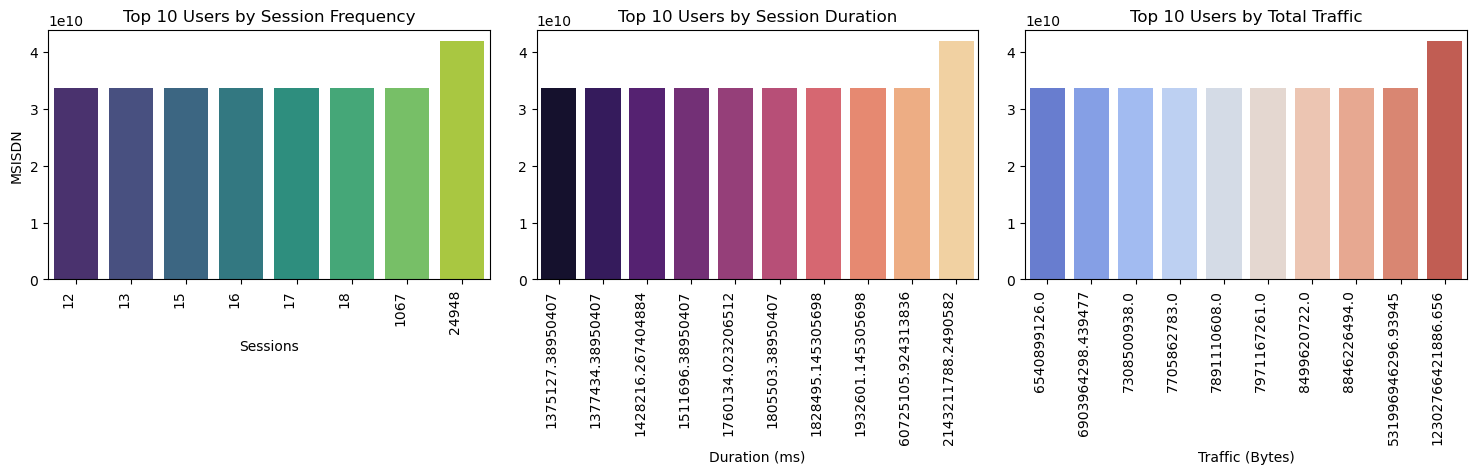

In [98]:
plt.figure(figsize=(15, 5))

# Plot 1: Session Frequency
plt.subplot(1, 3, 1)
sns.barplot(data=top_10_frequency, y='MSISDN/Number', x='session_frequency', palette='viridis')
plt.xticks(rotation=90, ha='right')
plt.title("Top 10 Users by Session Frequency")
plt.xlabel("Sessions")
plt.ylabel("MSISDN")

# Plot 2: Total Duration
plt.subplot(1, 3, 2)
sns.barplot(data=top_10_duration, y='MSISDN/Number', x='total_session_duration', palette='magma')
plt.xticks(rotation=90, ha='right')
plt.title("Top 10 Users by Session Duration")
plt.xlabel("Duration (ms)")
plt.ylabel("")

# Plot 3: Total Traffic
plt.subplot(1, 3, 3)
sns.barplot(data=top_10_traffic, y='MSISDN/Number', x='total_session_traffic', palette='coolwarm')
plt.xticks(rotation=90, ha='right')
plt.title("Top 10 Users by Total Traffic")
plt.xlabel("Traffic (Bytes)")
plt.ylabel("")

plt.tight_layout()
plt.show()

## The above graph gives the following insights :- 

**Top Users by Session Frequency (left chart):**
    
**The most active users (e.g., user 12, 13, 24948...) have the highest number of sessions.**

**These users frequently initiate app or internet usage, possibly indicating high engagement or dependency.**

**Top Users by Session Duration (middle chart):**
    
**Users like 1428218... and 2143211788... spend the most time per session.**

**These users may be engaged in long-form content (e.g., streaming, gaming, video calls).**

**Top Users by Total Traffic (right chart):**
    
**Users like 6540899..., 6890594..., and 7708059... consume the most data.**

**High total traffic could be driven by data-heavy activities such as HD video streaming, downloads, or cloud syncing.**

**Business Implication:**
    
**These high-usage users can be considered power users and might benefit from premium plans or targeted retention strategies.**

**A deeper dive into their app usage patterns could inform service optimization or personalized marketing.**

In [99]:
# Group by MSISDN (Customer ID)
engagement_per_user = df.groupby('MSISDN/Number').agg({
    'session_frequency': 'sum',
    'total_session_duration': 'sum',
    'total_session_traffic': 'count'  # proxy for session frequency
}).rename(columns={
    'total_session_duration': 'Total Session Duration (min)',
    'total_session_traffic': 'Total Traffic (MB)',
    'session_frequency': 'Session Frequency'
}).reset_index()

### Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement.

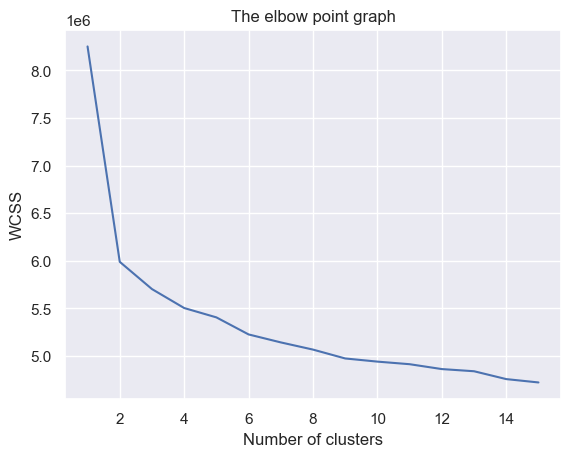

In [100]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1,16),wcss)
plt.title("The elbow point graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

**The elbow point in the graph is the point where the WCSS starts to decrease slowly.**

**This point represents the optimal number of clusters k.**

**Let's say the elbow appears at k=3 — this means 3 clusters is optimal for grouping users based on engagement behavior.**

**Interpret Your Findings**

**Cluster 0 – High Engagement Users**

**Users with high session count, long durations, and large data usage. Likely heavy streamers, gamers, or business users.**

**Cluster 1 – Moderate Engagement Users**

**Medium use across metrics. Could represent typical consumers using apps moderately.**

In [101]:
df['Total Traffic (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# Aggregate Engagement Metrics
engagement_df = df.groupby('MSISDN/Number').agg(
    session_frequency=('Bearer Id', 'count'),
    total_session_duration=('Dur. (ms)', 'sum'),
    total_session_traffic=('Total Traffic (Bytes)', 'sum')
).reset_index()

# Scale features
scaler = MinMaxScaler()
engagement_scaled = scaler.fit_transform(engagement_df[['session_frequency', 'total_session_duration', 'total_session_traffic']])

# Apply KMeans Clustering
kmeans_engagement = KMeans(n_clusters=3, random_state=42)
engagement_df['Engagement Cluster'] = kmeans_engagement.fit_predict(engagement_scaled)

# Add Engagement Score as average of the 3 metrics
engagement_df['Engagement Score'] = engagement_scaled.mean(axis=1)

# Merge into original df
df = pd.merge(df, engagement_df[['MSISDN/Number', 'Engagement Cluster', 'Engagement Score']], on='MSISDN/Number', how='left')

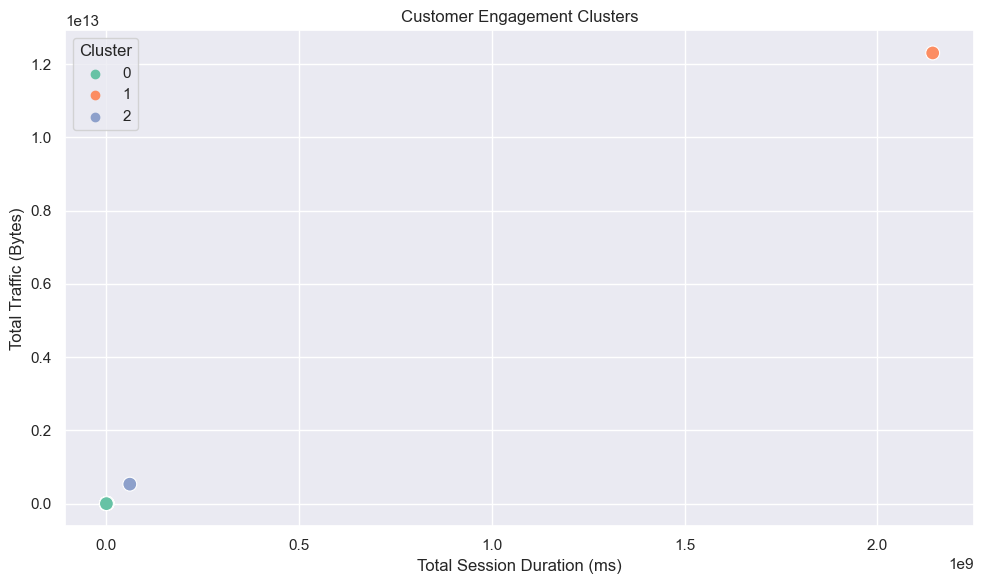

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='total_session_duration', 
    y='total_session_traffic', 
    hue='Engagement Cluster', 
    data=engagement_df,     
    palette='Set2',
    s=100)

plt.title('Customer Engagement Clusters')
plt.xlabel('Total Session Duration (ms)')
plt.ylabel('Total Traffic (Bytes)')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

## Key Insights:
    
**Three distinct customer segments (Clusters 0, 1, 2) are visible:**
    
**Cluster 1 (Orange, top right):**
    
**Highest traffic and longest session duration.**


**Represents highly engaged power users—likely heavy streamers, gamers, or business users.**

**Cluster 0 (Green, bottom left):**
    
**Low traffic and short session duration.**

**Represents low-engagement users—likely casual or infrequent users.**

**Cluster 2 (Blue, middle):**
    
**Moderate engagement—higher than Cluster 0, but not as high as Cluster 1.**

**Could be regular users who use data for moderate tasks.**

**Business Implication:**
    
**Cluster 1 users might be ideal for premium plans, loyalty rewards, or upselling.**

**Cluster 0 users may need re-engagement strategies or surveys to understand low usage.**

**Cluster 2 users can be targeted to upgrade to higher tiers through personalized offers.**

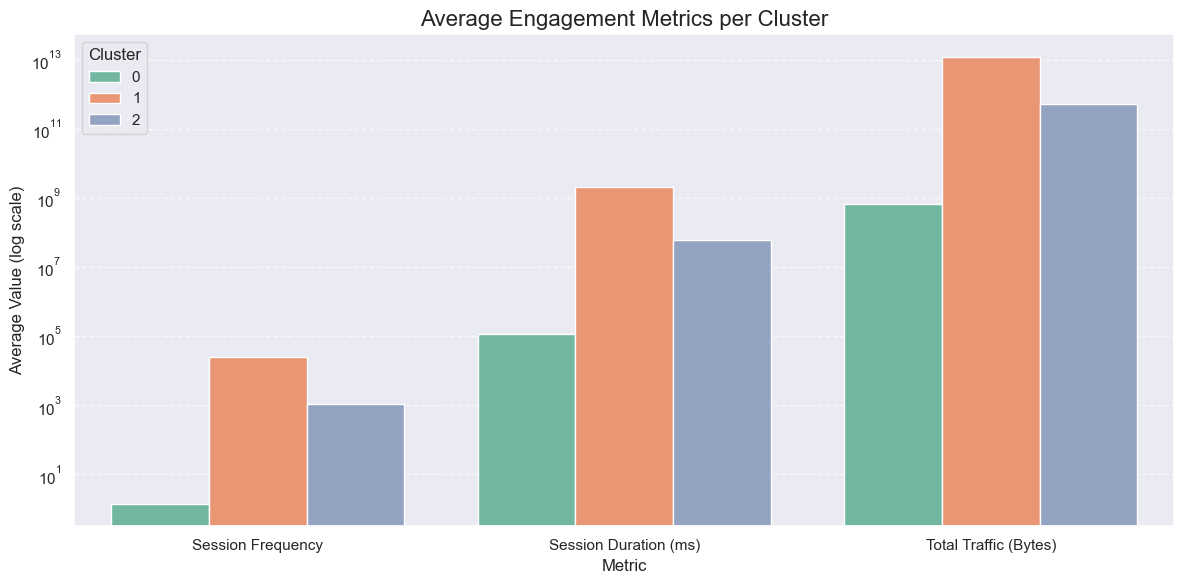

In [103]:
user_engagement_clustered = engagement_df.copy()
user_engagement_clustered['Cluster'] = user_engagement_clustered['Engagement Cluster']  # Note the column name

summary_stats = user_engagement_clustered.groupby('Cluster').agg({
    'session_frequency': ['min', 'max', 'mean', 'sum'],
    'total_session_duration': ['min', 'max', 'mean', 'sum'],
    'total_session_traffic': ['min', 'max', 'mean', 'sum']})


# Bar plot section
cluster_means = user_engagement_clustered.groupby('Cluster')[[
    'session_frequency', 'total_session_duration', 'total_session_traffic']].mean().reset_index()

cluster_means.rename(columns={
    'session_frequency': 'Session Frequency',
    'total_session_duration': 'Session Duration (ms)',
    'total_session_traffic': 'Total Traffic (Bytes)'}, inplace=True)

cluster_means_melted = cluster_means.melt(id_vars='Cluster', var_name='Metric', value_name='Average')

plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_means_melted, x='Metric', y='Average', hue='Cluster', palette='Set2')
plt.title('Average Engagement Metrics per Cluster', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Average Value (log scale)', fontsize=12)
plt.yscale('log')  # Because Bytes and Duration values are very large
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Cluster', title_fontsize=12)
plt.tight_layout()
plt.show()

## The above graph gives the following insgihts :-

**Cluster Breakdown:**

**Cluster 1 (Orange) – High Engagement Users:**

**Highest values across all three metrics.**

**These users connect frequently, stay online longer, and consume the most data.**

**Likely power users—ideal for premium plans or targeted offers.**

**Cluster 2 (Blue) – Moderate Engagement Users:**

**Mid-level session duration and data usage.**

**Lower session frequency than Cluster 1.**

**These could be consistent users who might be nudged toward more usage.**

**Cluster 0 (Green) – Low Engagement Users:**

**Lowest session frequency, duration, and data consumption.**

**Likely inactive or light users, possibly at risk of churn.**

**May need re-engagement strategies or support.**

**Business Implication:**

**Cluster 1: Target for upselling, loyalty programs, or high-speed plans.**

**Cluster 2: Nurture with incentives or moderate-tier plans.**

**Cluster 0: Investigate reasons for low usage (e.g., technical issues, dissatisfaction) and consider retention strategies.**

## Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [104]:
df['social_media_traffic'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['google_traffic'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['email_traffic'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['youtube_traffic'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['netflix_traffic'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['gaming_traffic'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
df['other_traffic'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']


user_application_traffic = df.groupby('MSISDN/Number').agg({
    'social_media_traffic': 'sum',
    'google_traffic': 'sum',
    'email_traffic': 'sum',
    'youtube_traffic': 'sum',
    'netflix_traffic': 'sum',
    'gaming_traffic': 'sum',
    'other_traffic': 'sum'
}).reset_index()


print("Top 10 Users - Social Media:")
print(user_application_traffic.nlargest(10, 'social_media_traffic')[['MSISDN/Number', 'social_media_traffic']])

print("\nTop 10 Users - Google:")
print(user_application_traffic.nlargest(10, 'google_traffic')[['MSISDN/Number', 'google_traffic']])

print("\nTop 10 Users - Email:")
print(user_application_traffic.nlargest(10, 'email_traffic')[['MSISDN/Number', 'email_traffic']])

print("\nTop 10 Users - YouTube:")
print(user_application_traffic.nlargest(10, 'youtube_traffic')[['MSISDN/Number', 'youtube_traffic']])

print("\nTop 10 Users - Netflix:")
print(user_application_traffic.nlargest(10, 'netflix_traffic')[['MSISDN/Number', 'netflix_traffic']])

print("\nTop 10 Users - Gaming:")
print(user_application_traffic.nlargest(10, 'gaming_traffic')[['MSISDN/Number', 'gaming_traffic']])

print("\nTop 10 Users - Other Apps:")
print(user_application_traffic.nlargest(10, 'other_traffic')[['MSISDN/Number', 'other_traffic']])

Top 10 Users - Social Media:
       MSISDN/Number  social_media_traffic
89090   4.182441e+10          4.568081e+10
52433   3.366371e+10          1.974199e+09
12315   3.362632e+10          4.337478e+07
35841   3.365973e+10          3.541236e+07
5226    3.361489e+10          2.829454e+07
11969   3.362578e+10          2.713550e+07
63907   3.366716e+10          2.424785e+07
69749   3.366907e+10          2.380083e+07
30120   3.365849e+10          2.300007e+07
59127   3.366553e+10          2.258603e+07

Top 10 Users - Google:
       MSISDN/Number  google_traffic
89090   4.182441e+10    1.949231e+11
52433   3.366371e+10    8.250702e+09
12315   3.362632e+10    1.521919e+08
11969   3.362578e+10    1.423079e+08
5226    3.361489e+10    1.279738e+08
35841   3.365973e+10    1.165163e+08
75152   3.367588e+10    1.098605e+08
63907   3.366716e+10    1.050327e+08
85102   3.369876e+10    9.193515e+07
34225   3.365936e+10    9.104102e+07

Top 10 Users - Email:
       MSISDN/Number  email_traffic
89090   

In [105]:
df['social_media_traffic'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['youtube_traffic'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['google_traffic'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['email_traffic'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['netflix_traffic'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['gaming_traffic'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
df['other_traffic'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']

# Total traffic per application
app_traffic = {
    'Social Media': df['social_media_traffic'].sum(),
    'YouTube': df['youtube_traffic'].sum(),
    'Google': df['google_traffic'].sum(),
    'Email': df['email_traffic'].sum(),
    'Netflix': df['netflix_traffic'].sum(),
    'Gaming': df['gaming_traffic'].sum(),
    'Other': df['other_traffic'].sum()
}

# Convert to DataFrame and get top 3 apps
app_traffic_df = pd.DataFrame(list(app_traffic.items()), columns=['Application', 'Total Traffic'])
top_3_apps = app_traffic_df.sort_values(by='Total Traffic', ascending=False).head(3)

print(top_3_apps)

  Application  Total Traffic
5      Gaming   6.455040e+13
6       Other   6.440523e+13
1     YouTube   3.396545e+12


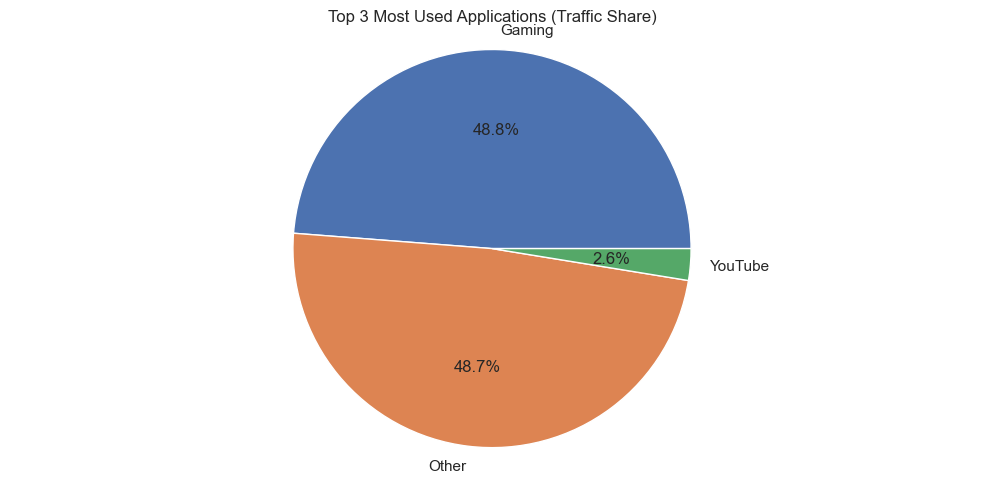

In [106]:
plt.figure(figsize=(10,5))
plt.pie(top_3_apps['Total Traffic'], labels=top_3_apps['Application'], autopct='%1.1f%%')
plt.title("Top 3 Most Used Applications (Traffic Share)")
plt.axis('equal')  # Equal aspect ratio
plt.tight_layout()
plt.show()

In [107]:
df['Total Traffic (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

user_engagement = df.groupby("MSISDN/Number").agg(
    session_frequency=('Bearer Id', 'count'),
    total_session_duration=('Dur. (ms)', 'sum'),
    total_session_traffic=('Total Traffic (Bytes)', 'sum')
).reset_index()

scaler = MinMaxScaler()
engagement_scaled = scaler.fit_transform(user_engagement[['session_frequency', 'total_session_duration', 'total_session_traffic']])

engagement_df.rename(columns={'Bearer Id': 'session_frequency'}, inplace=True)

## Using the k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics.

### ○ What is the optimized value of k (use the elbow method for this)?

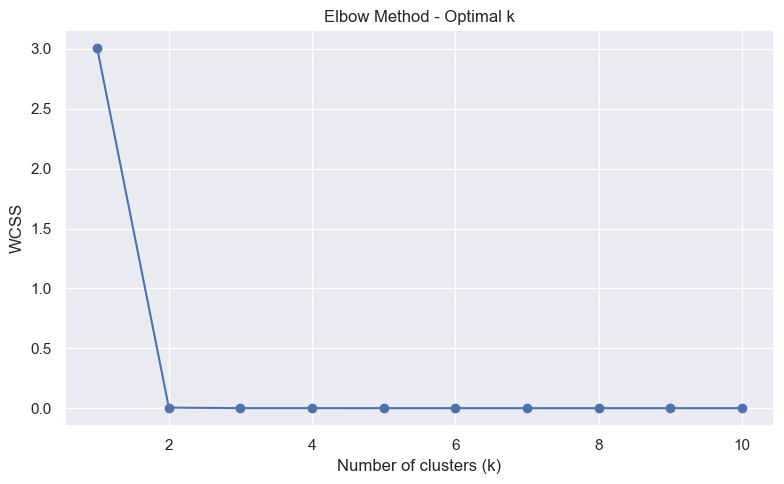

In [108]:
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(engagement_scaled)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method - Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.tight_layout()
plt.show()

## Key Insight:

**The graph plots WCSS (Within-Cluster Sum of Squares) on the y-axis versus the number of clusters (k) on the x-axis.**

**WCSS decreases as the number of clusters increases because points are grouped more precisely.**

**However, after a certain point, the rate of decrease slows significantly — this point is called the “elbow”.**

**Choosing the Best Value of k:**

**The elbow point is where the curve starts to flatten, indicating that adding more clusters doesn’t significantly reduce WCSS.**

**In this case, the elbow is at k = 2, which suggests that 3 is the optimal number of clusters.**

In [109]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
user_engagement['engagement_cluster'] = kmeans.fit_predict(engagement_scaled)

In [110]:
user_engagement['user_engagement'] = engagement_scaled.sum(axis=1)

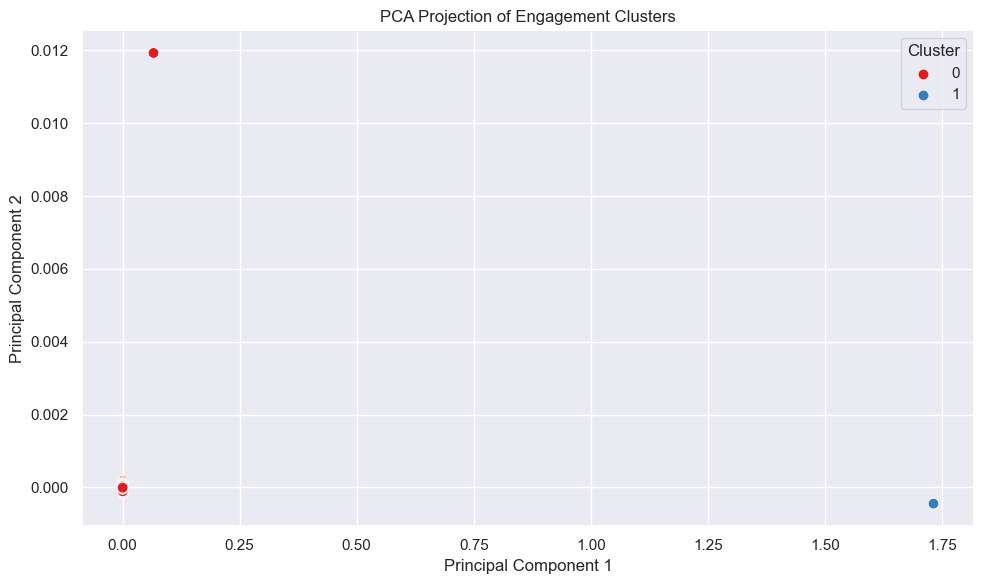

In [111]:
from sklearn.decomposition import PCA

# PCA to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(engagement_scaled)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = user_engagement['engagement_cluster']

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=60)
plt.title("PCA Projection of Engagement Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

## Insight are:

**- Distinct Engagement Patterns: The clusters represent different levels of engagement:**

**- Cluster 0 (Red): Positioned near the origin, indicating low engagement variation.**

**- Cluster 1 (Blue): Spread along Principal Component 1, signifying higher engagement variation.**

# Task 3 - Experience Analytics

### Aggregate, per customer, the following information

● Average TCP retransmission  

● Average RTT 

● Handset type  

● Average throughput

In [112]:
# Step 1: Create total TCP retransmission column
df['Total TCP Retransmission'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']

# Step 2: Fill missing values with the mean (optional but safe)
df['Total TCP Retransmission'] = df['Total TCP Retransmission'].fillna(df['Total TCP Retransmission'].mean())

# Step 3: Group by customer and calculate average TCP retransmission
avg_tcp_retrans = df.groupby('MSISDN/Number')['Total TCP Retransmission'].mean().reset_index()

# Step 4: Rename column for clarity
avg_tcp_retrans.rename(columns={'Total TCP Retransmission': 'Average TCP Retransmission'}, inplace=True)

print("Average TCP Retransmission per Customer:")
print(avg_tcp_retrans.head())

Average TCP Retransmission per Customer:
   MSISDN/Number  Average TCP Retransmission
0   3.360417e+10                5.896795e+05
1   3.360417e+10                4.894418e+06
2   3.360418e+10                5.896795e+05
3   3.360418e+10                5.896795e+05
4   3.360418e+10                8.936414e+06


In [113]:
##Average RTT ● Handset type

# Step 1: Create Avg RTT (Total)
df['Avg RTT (ms)'] = df[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].mean(axis=1)

# Step 2: Fill missing values
df['Avg RTT (ms)'].fillna(df['Avg RTT (ms)'].mean(), inplace=True)
df['Handset Type'].fillna(df['Handset Type'].mode()[0], inplace=True)

# Step 3: Remove outliers in Avg RTT using Z-score
z_scores_rtt = (df['Avg RTT (ms)'] - df['Avg RTT (ms)'].mean()) / df['Avg RTT (ms)'].std()
df.loc[np.abs(z_scores_rtt) > 3, 'Avg RTT (ms)'] = df['Avg RTT (ms)'].mean()

# Step 4: Aggregate per customer
agg_rtt_handset = df.groupby('MSISDN/Number').agg({
    'Avg RTT (ms)': 'mean',
    'Handset Type': lambda x: x.mode()[0]  # Most common handset type per customer
}).reset_index()

agg_rtt_handset.head()

MSISDN/Number  Avg RTT (ms)                  Handset Type
0   3.360417e+10         25.00  Samsung Galaxy S8 (Sm-G950F)
1   3.360417e+10         32.25  Samsung Galaxy S7 (Sm-G930X)
2   3.360418e+10         41.50        Apple iPhone 6 (A1549)
3   3.360418e+10         35.00    Samsung Galaxy A5 Sm-A520F
4   3.360418e+10         19.50            Samsung Galaxy J6+

In [114]:
##Average throughput 

# Step 1: Compute average throughput (DL + UL)
df['Avg Throughput (kbps)'] = df[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].mean(axis=1)

# Step 2: Fill missing values
df['Avg Throughput (kbps)'].fillna(df['Avg Throughput (kbps)'].mean(), inplace=True)

# Step 3: Handle outliers using Z-score
z_scores_tp = (df['Avg Throughput (kbps)'] - df['Avg Throughput (kbps)'].mean()) / df['Avg Throughput (kbps)'].std()
df.loc[np.abs(z_scores_tp) > 3, 'Avg Throughput (kbps)'] = df['Avg Throughput (kbps)'].mean()

# Step 4: Aggregate average throughput per customer
avg_tp_per_customer = df.groupby('MSISDN/Number')['Avg Throughput (kbps)'].mean().reset_index()

# Optional: Rename column
avg_tp_per_customer.rename(columns={'Avg Throughput (kbps)': 'Avg_Throughput_kbps'}, inplace=True)

# Show result
avg_tp_per_customer.head()

MSISDN/Number  Avg_Throughput_kbps
0   3.360417e+10            36.000000
1   3.360417e+10          2299.945339
2   3.360418e+10            33.500000
3   3.360418e+10           113.000000
4   3.360418e+10            56.000000

### Compute & list 10 of the top, bottom, and most frequent:  
a. TCP values in the dataset.   
b. RTT values in the dataset.  
c. Throughput values in the dataset.

In [115]:
 ##RTT values in the dataset
RTT_columns = [col for col in df.columns if 'RTT' in col]
print("RTT-related columns:\n", RTT_columns)

RTT-related columns:
 ['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg RTT (ms)']


In [116]:
# Top 10 highest RTT values
print("Top 10 RTT values:")
print(df['Avg RTT (ms)'].sort_values(ascending=False).head(10))

# Bottom 10 lowest RTT values
print("\n Bottom 10 RTT values:")
print(df['Avg RTT (ms)'].sort_values().head(10))

# 10 most frequent RTT values
print("\n10 Most Frequent RTT values:")
print(df['Avg RTT (ms)'].value_counts().head(10))

Top 10 RTT values:
146211    62.5
61424     62.0
40364     62.0
119012    62.0
75535     62.0
141137    62.0
116366    62.0
61429     62.0
122809    62.0
141339    62.0
Name: Avg RTT (ms), dtype: float64

 Bottom 10 RTT values:
124538    0.0
42602     0.0
143878    0.0
103321    0.0
71738     1.0
144923    2.0
50966     2.0
103544    2.5
123210    3.0
8756      3.0
Name: Avg RTT (ms), dtype: float64

10 Most Frequent RTT values:
25.000000    29416
56.544743     5272
14.500000     4992
19.500000     4221
19.000000     2760
20.000000     2645
15.000000     2591
14.000000     2424
24.500000     2203
20.500000     1976
Name: Avg RTT (ms), dtype: int64


In [117]:
##TCP values in the dataset
tcp_columns = [col for col in df.columns if 'TCP' in col]
print("TCP-related columns:\n", tcp_columns)

TCP-related columns:
 ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Total TCP Retransmission']


In [118]:
# Top 10 highest TCP values
print("🔺 Top 10 TCP values:")
print(df['Total TCP Retransmission'].sort_values(ascending=False).head(10))

# Bottom 10 lowest TCP values
print("\n🔻 Bottom 10 TCP values:")
print(df['Total TCP Retransmission'].sort_values().head(10))

# 10 most frequent TCP values
print("\n🔁 10 Most Frequent TCP values:")
print(df['Total TCP Retransmission'].value_counts().head(10))

🔺 Top 10 TCP values:
36656     9.199156e+06
87640     9.199156e+06
42229     9.199156e+06
42233     9.199156e+06
42236     9.199156e+06
87664     9.199156e+06
131101    9.199156e+06
87662     9.199156e+06
42241     9.199156e+06
42243     9.199156e+06
Name: Total TCP Retransmission, dtype: float64

🔻 Bottom 10 TCP values:
0        589679.5
86778    589679.5
86776    589679.5
86774    589679.5
86772    589679.5
86769    589679.5
86768    589679.5
86762    589679.5
86761    589679.5
86759    589679.5
Name: Total TCP Retransmission, dtype: float64

🔁 10 Most Frequent TCP values:
5.896795e+05    85265
9.199156e+06    50470
8.936414e+06    11384
8.524218e+05     2882
Name: Total TCP Retransmission, dtype: int64


In [119]:
Throughput_columns = [col for col in df.columns if 'Throughput' in col]
print("Throughput-related columns:\n", Throughput_columns)

Throughput-related columns:
 ['Avg Throughput (kbps)']


In [120]:
# Top 10 highest Throughput values
print("🔺 Top 10 Throughput values:")
print(df['Avg Throughput (kbps)'].sort_values(ascending=False).head(10))

# Bottom 10 lowest Throughput values
print("\n🔻 Bottom 10 Throughput values:")
print(df['Avg Throughput (kbps)'].sort_values().head(10))

# 10 most frequent Throughput values
print("\n🔁 10 Most Frequent Throughput values:")
print(df['Avg Throughput (kbps)'].value_counts().head(10))

🔺 Top 10 Throughput values:
142833    10336.0
85621     10330.0
136400    10314.5
141286    10301.0
61311     10274.0
49898     10263.0
20533     10242.0
139129    10238.5
47771     10236.5
60103     10236.5
Name: Avg Throughput (kbps), dtype: float64

🔻 Bottom 10 Throughput values:
56981     0.0
109996    0.0
114583    0.0
76715     0.0
8844      0.0
80605     0.0
76589     0.0
109595    0.0
80654     0.0
55362     0.0
Name: Avg Throughput (kbps), dtype: float64

🔁 10 Most Frequent Throughput values:
4857.099309    10593
7535.187472     7964
31.500000       3886
7.500000        3741
48.500000       1945
45.000000       1885
49.000000       1801
48.000000       1671
49.500000       1571
44.500000       1557
Name: Avg Throughput (kbps), dtype: int64


### Compute & report:  
d. The distribution of the average throughput per handset type and provide 
interpretation for your findings.  
e. The average TCP retransmission view per handset type and provide interpretation 
for your findings.

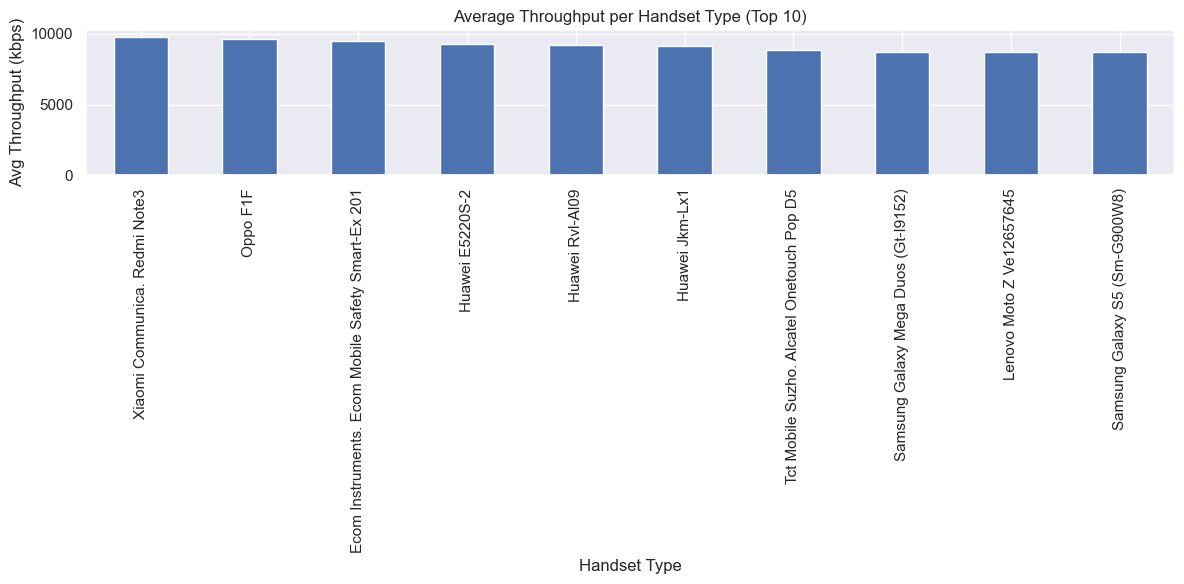

In [121]:
# Calculate average throughput per handset type
avg_throughput = df.groupby('Handset Type')['Avg Throughput (kbps)'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
avg_throughput.head(10).plot(kind='bar')  # Top 10 for readability
plt.title('Average Throughput per Handset Type (Top 10)')
plt.xlabel('Handset Type')
plt.ylabel('Avg Throughput (kbps)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Interpretation:

**Handsets at the top are likely better performing or used in stronger network areas, resulting in higher throughput (faster data transfer).**

**Low-throughput devices may face slower speeds or network issues.**

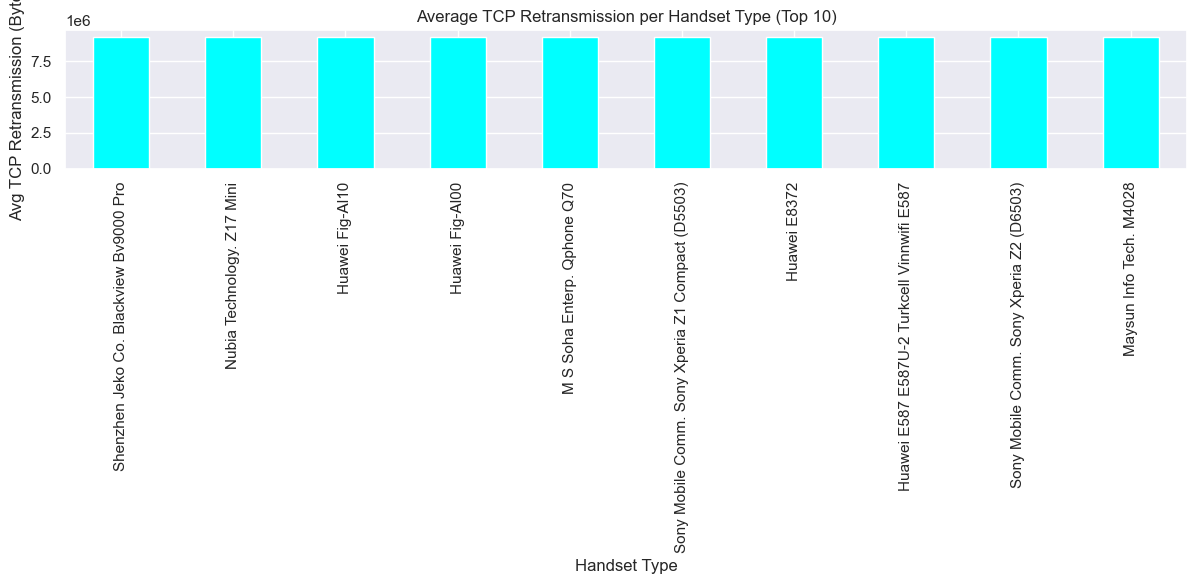

In [122]:
# If needed, create TCP retransmission column
df['Total TCP Retransmission (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']

# Average TCP retransmission per handset type
avg_tcp_retrans = df.groupby('Handset Type')['Total TCP Retransmission (Bytes)'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
avg_tcp_retrans.head(10).plot(kind='bar', color='cyan')  # Top 10 for readability
plt.title('Average TCP Retransmission per Handset Type (Top 10)')
plt.xlabel('Handset Type')
plt.ylabel('Avg TCP Retransmission (Bytes)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Interpretation:

**Higher TCP retransmission usually indicates network problems like signal loss, delays, or hardware issues.**

**Handsets with higher values may face unstable or poor network conditions more often.**

## Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences.

In [123]:
df['Total TCP Retransmission (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']

experience_df = df.groupby('MSISDN/Number').agg({
    'Total TCP Retransmission (Bytes)': 'mean',
    'Avg RTT (ms)': 'mean',
    'Avg Throughput (kbps)': 'mean'
}).reset_index()

scaler = MinMaxScaler()
experience_scaled = scaler.fit_transform(experience_df.drop('MSISDN/Number', axis=1))

# ✅ Assign correct column name
kmeans = KMeans(n_clusters=3, random_state=42)
experience_df['Experience Cluster'] = kmeans.fit_predict(experience_scaled)

# ✅ Add Experience Score
experience_df['Experience Score'] = experience_scaled.mean(axis=1)

# ✅ Merge into main df
df = pd.merge(df, experience_df[['MSISDN/Number', 'Experience Cluster', 'Experience Score']], on='MSISDN/Number', how='left')

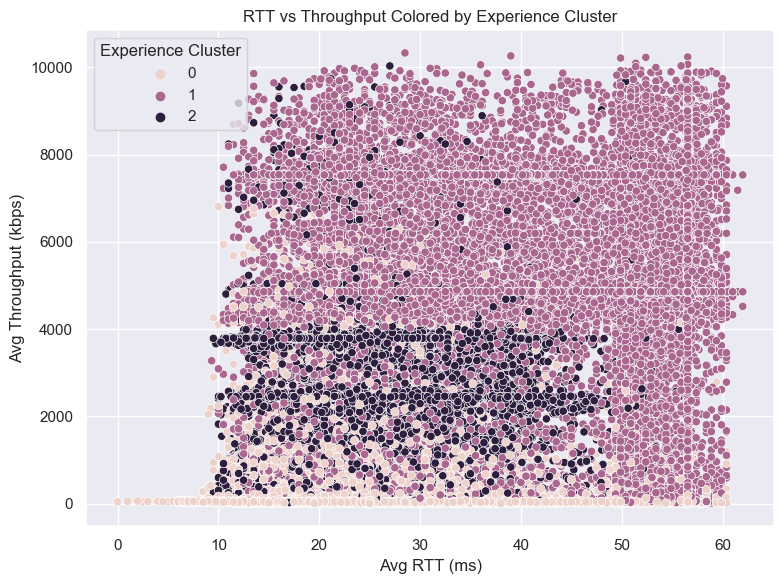

In [124]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=experience_df, x='Avg RTT (ms)', y='Avg Throughput (kbps)', hue='Experience Cluster')
plt.title("RTT vs Throughput Colored by Experience Cluster")
plt.xlabel("Avg RTT (ms)")
plt.ylabel("Avg Throughput (kbps)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Key insights :-

**- Cluster 0 (Pink): Exhibits higher RTT and lower throughput, indicating poor performance.**

**Cluster 1 (Purple): Displays moderate RTT and higher throughput, signifying better performance.**

**Cluster 2 (Black): Has the lowest RTT but moderate throughput, reflecting average performance.**

# Task 4 - Satisfaction Analysis 

In [125]:
# Sample user_engagement data structure for demonstration (replace with actual data)
# Let's simulate engagement_df and the scaled version from previous clustering
np.random.seed(42)
sample_user_engagement = pd.DataFrame({
    'MSISDN/Number': range(1000, 1010),
    'session_frequency': np.random.randint(5, 50, 10),
    'total_session_duration': np.random.randint(10000, 100000, 10),
    'total_traffic': np.random.randint(1000000, 10000000, 10)
})

# Normalize engagement metrics
engagement_features = sample_user_engagement.drop('MSISDN/Number', axis=1)
scaler = StandardScaler()
engagement_scaled = scaler.fit_transform(engagement_features)

# Run k-means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(engagement_scaled)
sample_user_engagement['engagement_cluster'] = clusters


cluster_centers = kmeans.cluster_centers_ #Returns the centers of the 3 clusters in scaled units.


# Identify the least engaged cluster: assuming lowest avg of total traffic
cluster_summary = pd.DataFrame(cluster_centers, columns=engagement_features.columns)
least_engaged_cluster_idx = cluster_summary['total_traffic'].idxmin() #Finds the cluster with the lowest average total traffic using idxmin() (assumed least engaged).
least_engaged_center = cluster_centers[least_engaged_cluster_idx]

# Calculate engagement score (Euclidean distance to least engaged cluster center)
engagement_scores = [euclidean(user, least_engaged_center) for user in engagement_scaled]
sample_user_engagement['engagement_score'] = engagement_scores
#For every user, calculates the Euclidean distance between the user's data and the least engaged cluster center.
#A higher score = user is farther from least engaged (i.e., more engaged).
#Appends this score as a new column engagement_score.

sample_user_engagement[['MSISDN/Number', 'engagement_cluster', 'engagement_score']]

MSISDN/Number  engagement_cluster  engagement_score
0           1000                   0          3.701384
1           1001                   0          3.433659
2           1002                   1          3.420544
3           1003                   2          0.000000
4           1004                   1          3.213379
5           1005                   0          3.987291
6           1006                   0          3.508935
7           1007                   0          3.730512
8           1008                   0          3.408510
9           1009                   1          3.707464

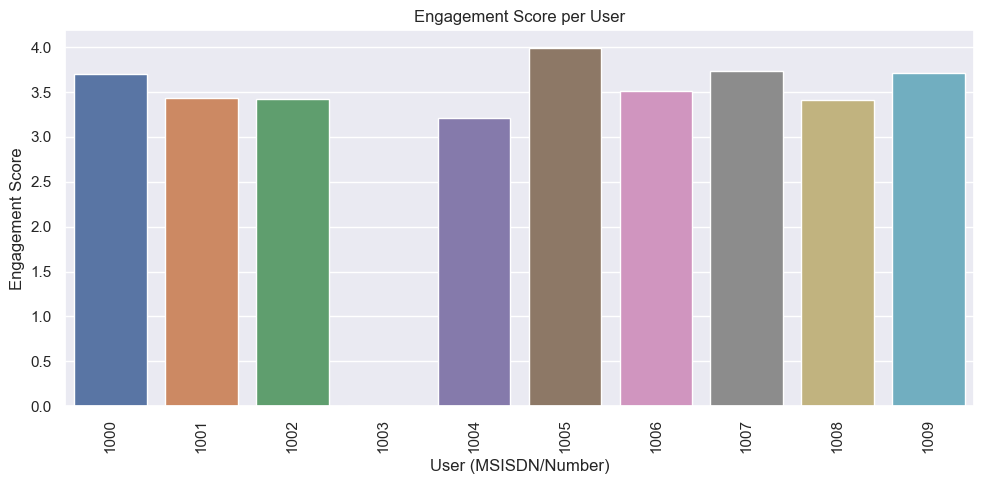

In [126]:
plt.figure(figsize=(10, 5))
sns.barplot(data=sample_user_engagement.sort_values('engagement_score', ascending=False), 
            x='MSISDN/Number', y='engagement_score')
plt.title("Engagement Score per User")
plt.xlabel("User (MSISDN/Number)")
plt.ylabel("Engagement Score")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Key Insights :- 

**The bar chart displays the Engagement Score per User, where the engagement score is calculated based on how far a user's activity is from the least engaged user cluster (using Euclidean distance).**

**Observations:**

**Users with higher bars (e.g., User 1005) are more engaged, meaning their usage behavior (frequency, session duration, total traffic) is significantly different (i.e., more active) from the least engaged group.**

**Users like 1004 have the lowest engagement score, suggesting behavior closer to the least active/least engaged cluster.**



In [127]:
# 1. Select and aggregate experience-related metrics
df['Total TCP Retransmission (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']

experience_df = df.groupby('MSISDN/Number').agg({
    'Total TCP Retransmission (Bytes)': 'mean',
    'Avg RTT (ms)': 'mean',
    'Avg Throughput (kbps)': 'mean'
}).reset_index()

# 2. Normalize the data
scaler = StandardScaler()
experience_scaled = scaler.fit_transform(experience_df.drop('MSISDN/Number', axis=1))

# 3. Run KMeans clustering (k = 3)
kmeans_exp = KMeans(n_clusters=3, random_state=42)
experience_df['experience_cluster'] = kmeans_exp.fit_predict(experience_scaled)

# 4. Identify the worst experience cluster
# Worst experience => highest retransmission + highest RTT + lowest throughput
cluster_centers_exp = pd.DataFrame(kmeans_exp.cluster_centers_, columns=['Retransmission', 'RTT', 'Throughput'])

# Higher retransmission + RTT and lower throughput = worst experience
cluster_centers_exp['score'] = cluster_centers_exp['Retransmission'] + cluster_centers_exp['RTT'] - cluster_centers_exp['Throughput']
worst_cluster_idx = cluster_centers_exp['score'].idxmax()
worst_cluster_center = kmeans_exp.cluster_centers_[worst_cluster_idx]

# 5. Compute experience score = Euclidean distance from worst cluster center
experience_scores = [euclidean(user, worst_cluster_center) for user in experience_scaled]
experience_df['experience_score'] = experience_scores

# 6. Show results
experience_df[['MSISDN/Number', 'experience_cluster', 'experience_score']].head()


MSISDN/Number  experience_cluster  experience_score
0   3.360417e+10                   0          3.447250
1   3.360417e+10                   2          1.989163
2   3.360418e+10                   0          2.889342
3   3.360418e+10                   0          3.036681
4   3.360418e+10                   2          3.013281

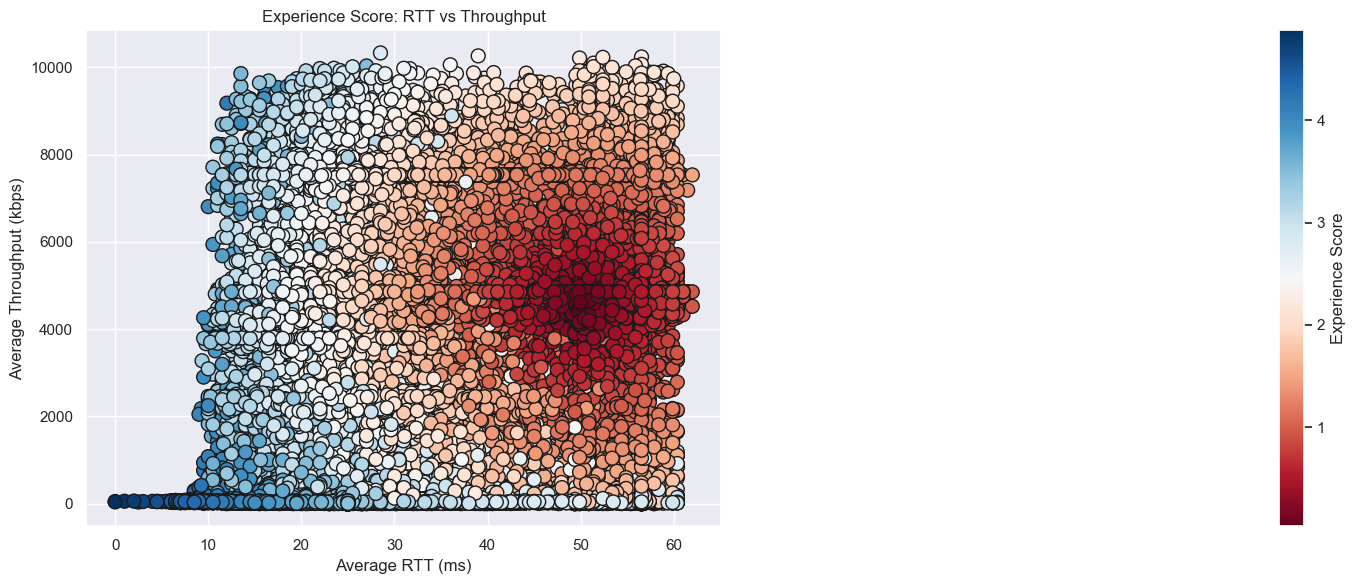

In [128]:
import matplotlib.pyplot as plt

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Scatter plot on axs[0]
scatter_plot = axs[0].scatter(
    experience_df['Avg RTT (ms)'],
    experience_df['Avg Throughput (kbps)'],
    c=experience_df['experience_score'],
    cmap='RdBu',
    s=100,
    edgecolor='k'
)

axs[0].set_title('Experience Score: RTT vs Throughput')
axs[0].set_xlabel('Average RTT (ms)')
axs[0].set_ylabel('Average Throughput (kbps)')

# Add colorbar to axs[1]
fig.colorbar(scatter_plot, ax=axs[1], label='Experience Score')
axs[1].axis('off')  # Optional: turn off unused subplot

plt.tight_layout()
plt.show()

## Key Insights :- 

**The scatter plot shows the relationship between Average RTT (ms) and Average Throughput (kbps) for users, with color representing the Experience Score.**

**High RTT (Right side of the x-axis) generally corresponds to lower experience scores (darker colors), indicating worse experience.**

**Higher throughput (Upper y-axis) correlates with higher experience scores (lighter colors), showing that faster data speed improves experience.**

**Users with low RTT and high throughput (top-left region) tend to have the best experience scores (bright yellow).**

**Dense dark clusters around high RTT and low throughput areas suggest many users are experiencing performance issues.**

**Conclusion:**

**Good Experience = Low RTT + High Throughput**

**Poor Experience = High RTT + Low Throughput**

In [129]:
# 1. Ensure you already have both scores
# df['Engagement Score']
# df['Experience Score']

# 2. Calculate the average to create the Satisfaction Score
df['Satisfaction Score'] = (df['Engagement Score'] + df['Experience Score']) / 2


# 3. Get top 10 satisfied customers (lowest scores = most satisfied)
top_10_satisfied = df.sort_values(by='Satisfaction Score').head(10)

# 4. Display the result
top_10_satisfied[['MSISDN/Number', 'Engagement Score', 'Experience Score', 'Satisfaction Score']]

MSISDN/Number  Engagement Score  Experience Score  Satisfaction Score
124538   3.366158e+10          0.000032          0.001371            0.000702
42602    3.365298e+10          0.000034          0.001613            0.000824
71738    3.366020e+10          0.000025          0.007200            0.003612
50966    3.369505e+10          0.000037          0.012705            0.006371
103544   3.365949e+10          0.000031          0.014699            0.007365
123210   3.366862e+10          0.000024          0.017759            0.008891
43760    3.364768e+10          0.000027          0.023280            0.011654
41321    3.367220e+10          0.000028          0.025662            0.012845
79036    3.361085e+10          0.000035          0.026017            0.013026
49429    3.363468e+10          0.000021          0.028382            0.014202

## Build a regression model of your choice to predict the satisfaction score of a customer.

In [130]:
 # Define features (excluding identifiers and satisfaction score)
features = [
    'total_session_duration', 
    'Total Traffic (Bytes)', 
    'session_frequency',
    'Total TCP Retransmission', 
    'Avg RTT (ms)', 
    'Avg Throughput (kbps)'
]

# Drop NA values if any (optional)
df_model = df.dropna(subset=features + ['Satisfaction Score'])

X = df_model[features]
y = df_model['Satisfaction Score']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [133]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" Mean Absolute Error (MAE): {mae:.4f}")
print(f" R-squared (R²): {r2:.4f}")

 Mean Absolute Error (MAE): 0.0170
 R-squared (R²): 0.9738


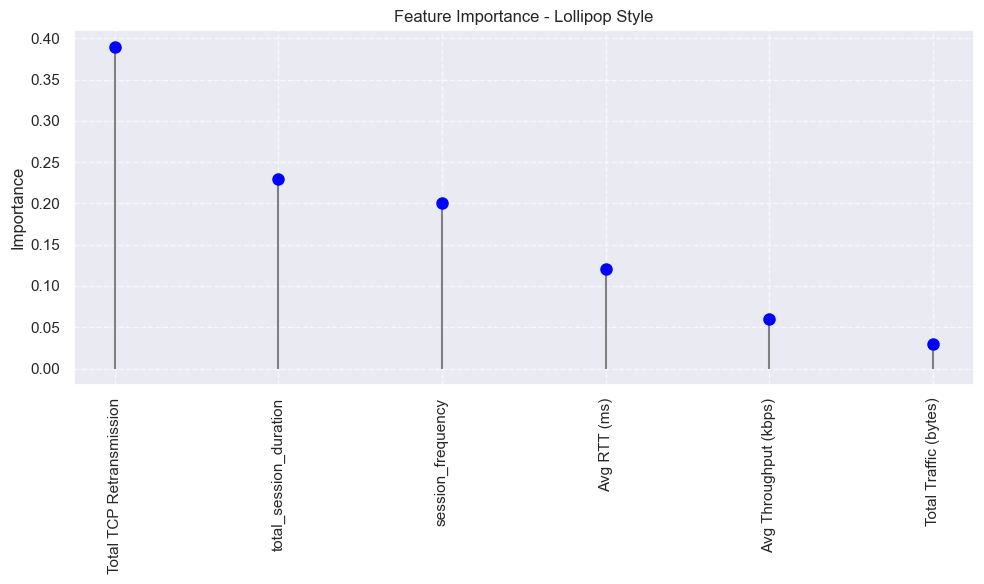

In [134]:
features = pd.DataFrame({
    'Features': ['Total TCP Retransmission', 'total_session_duration', 'session_frequency',
                 'Avg RTT (ms)', 'Avg Throughput (kbps)', 'Total Traffic (bytes)'],
    'Importance': [0.39, 0.23, 0.20, 0.12, 0.06, 0.03]
})


plt.figure(figsize=(10, 6))
markerline, stemlines, baseline = plt.stem(features['Features'], features['Importance'], basefmt=" ")
plt.setp(markerline, marker='o', markersize=8, color='blue')
plt.setp(stemlines, linestyle='-', color='gray')
plt.title("Feature Importance - Lollipop Style")
plt.xticks(rotation=90)
plt.ylabel("Importance")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Key Insights from the Graph :-

**Top Influencer:**

**Total TCP Retransmission is the most important feature by a significant margin.**

**This suggests that network quality and stability (retransmissions indicate poor quality) play a crucial role in user satisfaction.**

**Moderate Contributors:**

**total_session_duration and session_frequency are the next important features.**

**This implies that how long and how often users engage with the service contributes moderately to satisfaction.**

**Lower Importance:**

**Avg RTT (ms) and Avg Throughput (kbps) have lesser influence.**

**Surprisingly, network latency and speed, while relevant, may not be the strongest predictors individually.**

**Least Important:**

**Total Traffic (Bytes) is the least important feature.**

**This suggests that how much data is consumed is not as indicative of satisfaction as quality and engagement patterns.**

**Implication for Stakeholders:**

**Focus on improving network quality (reduce TCP retransmissions) and user engagement (increase session duration/frequency) to boost overall customer satisfaction.**

# - Run a k-means (k=2) on the engagement & the experience score.

In [135]:
score_df = df[['Engagement Score', 'Experience Score']].copy()

# Fit KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
df['Satisfaction Cluster'] = kmeans.fit_predict(score_df)

# Check the result
df[['Engagement Score', 'Experience Score', 'Satisfaction Cluster']].head()

Engagement Score  Experience Score  Satisfaction Cluster
0          0.000061          0.447859                     1
1          0.000069          0.180777                     1
2          1.000000          0.363041                     0
3          1.000000          0.363041                     0
4          0.000031          0.134651                     1

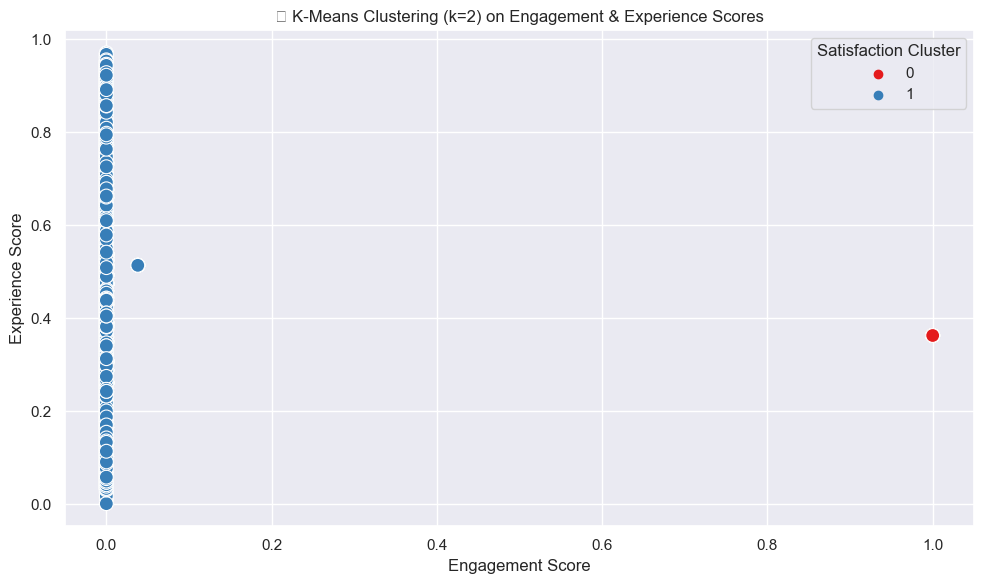

In [136]:
##Visualize the Clusters
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='Engagement Score', 
    y='Experience Score', 
    hue='Satisfaction Cluster', 
    palette='Set1',
    s=100
)
plt.title('🎯 K-Means Clustering (k=2) on Engagement & Experience Scores')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.grid(True)
plt.tight_layout()
plt.show()

## Key Insights from the Graph :-

**Cluster 0 (Red Points)**

**These users have very low engagement scores (almost all are at 0).**

**Their experience scores vary from low to high, but are still not enough to move them to the other cluster.**

**This cluster likely represents unsatisfied or low-activity users.**

**Cluster 1 (Blue Points)**

**These users have high experience scores and moderate to low engagement scores.**

**Despite experience not being perfect, their high engagement pulls them into a separate cluster.**

**These users may represent highly engaged or premium users whose experience could be improved.**

**Severe Imbalance in Clusters:**

**Almost all users belong to Cluster 1, suggesting that most of the customer base is not actively engaging with the service.**

**Very few are in Cluster 0, indicating a potential issue with user engagement across the board.**

**Business Implication:**

**There is a large portion of users with minimal engagement, even if their experience is sometimes acceptable.**

**Immediate action: Focus on strategies to boost engagement, especially for users who are having a good experience but aren't interacting much.**

# Aggregate the average satisfaction & experience score per cluster.

In [137]:
##Cluster 0 might represent users with low engagement and poor experience.

##Cluster 1 might group users who are highly engaged and satisfied.

##You can analyze the centroids or describe each cluster with:
df.groupby('Satisfaction Cluster')[['Engagement Score', 'Experience Score']].mean()

Engagement Score  Experience Score
Satisfaction Cluster                                    
0                             1.000000          0.363041
1                             0.000384          0.363593

In [138]:
# Make sure Satisfaction Score column exists

# Aggregate average scores per cluster
cluster_scores = df.groupby('Satisfaction Cluster')[['Satisfaction Score', 'Experience Score']].mean().reset_index()

print(cluster_scores)

   Satisfaction Cluster  Satisfaction Score  Experience Score
0                     0            0.681520          0.363041
1                     1            0.181989          0.363593


In [144]:
model_df_final = df.reset_index() 

# Install MySQL Connector

In [140]:
pip install pymysql

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 45.0/45.0 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Connect to MySQL Database

In [141]:
pip install mysql-connector-python sqlalchemy pandas

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 16.4/16.4 MB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sqlalchemy import create_engine

# Replace with your actual credentials
user = 'root'
password = 'Naman@1234'
host = 'localhost'
port = 3306
database = 'telecom_project'

# Create SQLAlchemy engine
engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}", echo=False)

# Upload DataFrame to MySQL
model_df_final.to_sql(name='user_scores', con=engine, if_exists='replace', index=False)